# Tesco Large

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import statsmodels.api as sm 
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [232]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

In [233]:
#import dataset - pladis products
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

# import dataset - competitors products
tes_dig_400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tes_mill_400g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tes_rt_250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tes_rt_300g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")
# tes_rt_300g_missing=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


## Exploration of the dataset 

In [234]:
pd.plotting.register_matplotlib_converters()

In [235]:
def basic_info(df):
    # look at data
    display(df.head())

    # look a shape of data
    display(df.shape)

    # look at data types. Ideally look at all rows. 
    display(df.dtypes)
   
    # display descriptive statistics
    display(df.describe(percentiles=[0.25,0.5,0.75,0.95,0.99]))
    
    print('Dataset has: ' + str(len(df.index)) + 'rows')
    
    print('Missing values:') 
    print(df.isnull().sum())
    
    print('Screen out distribution>100:')
    print(df[df.Distribution>100].count(axis=0))
    
    print('Screen out negative data: ')
    print(df[df.iloc[:,1:8]<0].count(axis=0))
    

In [236]:
#drop missing values
# tes_rt_300g = df.dropna(subset=['Volume'])
# tes_rt_300g.head()
    

In [237]:
def plot_data(dt):

# specify columns to plot
    values = dt.values
#   groups = [1, 2, 3, 4, 5, 6]
    
    # plot each column
    plt.figure()
    plt.figure(figsize=(23, 15))

    # for group in groups:
    plt.subplot(6, 1, 1)
    dt.groupby('Date')['Volume'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Volume',y=0.5, loc='right')
    plt.subplot(6, 1, 2)
    dt.groupby('Date')['Value'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Value', y=0.5, loc='right')
    plt.subplot(6, 1, 3)
    dt.groupby('Date')['Distribution'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Distribution', y=0.5, loc='right')
    plt.subplot(6, 1, 4)
    dt.groupby('Date')['Promotional Distribution'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Promotional Distribution', y=0.5, loc='right')
    plt.subplot(6, 1, 5)
    dt.groupby('Date')['£/unit'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('£/unit', y=0.5, loc='right')
    plt.subplot(6, 1, 6)
    dt.groupby('Date')['£/kg'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('£/kg', y=0.5, loc='right')

    plt.show()

#     dt.groupby('Date')['Units'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Volume'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Value'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Distribution'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Promotional Distribution'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['£/unit'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['£/kg'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)


In [238]:
mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]
tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
tes_large=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin,
           tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]

In [239]:
#add columns related to datetime
tes_large1=[]

for df in tes_large:
#     df = DataFrame(data)
    df=df[:275]
    date_time = df['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    df['SDESC']=date_time
    df.rename(columns={'SDESC':'Date'}, inplace=True)
    
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    # month as number
    df['month'] = pd.DatetimeIndex(df['Date']).month
    # week as number
    df['week'] = pd.DatetimeIndex(df['Date']).week
#     df=df.set_index('Date')
    tes_large1.append(df)
    continue
    
# mcv_dig_250g=tes_large1[0]
# mcv_dig_400g=tes_large1[1]
# mcv_dig_400g_twin=tes_large1[2]
# mcv_rt_300g=tes_large1[3]
# mcv_rt_300g_twin=tes_large1[4]
# tes_dig_400g=tes_large1[5]
# tes_mill_400g=tes_large1[6]
# tes_rt_250g=tes_large1[7]
# tes_rt_300g=tes_large1[8]
# # tes_rt_300g_missing=tes_large1[8]

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [240]:
tes_large2=[]
for i in tes_large1:
    i.dropna(subset=['Volume'])
    tes_large2.append(i)
    i.head()

,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,26252,6563.0,23366.0,97,0,0.890066,3.560262,2014,4,12,50
1,2014-12-20,28719,7179.8,25560.4,97,0,0.890017,3.560043,2014,4,12,51
2,2014-12-27,26468,6617.0,23557.3,97,0,0.890029,3.560118,2014,4,12,52
3,2015-01-03,19371,4842.8,17240.9,97,0,0.890037,3.560110,2015,1,1,1
4,2015-01-10,19424,4856.0,17286.2,97,0,0.889940,3.559761,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,18110,4527.5,18105.7,58,0,0.999763,3.999050,2020,1,2,7
271,2020-02-22,17402,4350.5,17400.6,58,0,0.999920,3.999678,2020,1,2,8
272,2020-02-29,18420,4605.0,18414.6,58,0,0.999707,3.998827,2020,1,2,9
273,2020-03-07,21021,5255.3,21021.0,58,0,1.000000,3.999962,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,26252,6563.0,23366.0,97,0,0.890066,3.560262,2014,4,12,50
1,2014-12-20,28719,7179.8,25560.4,97,0,0.890017,3.560043,2014,4,12,51
2,2014-12-27,26468,6617.0,23557.3,97,0,0.890029,3.560118,2014,4,12,52
3,2015-01-03,19371,4842.8,17240.9,97,0,0.890037,3.560110,2015,1,1,1
4,2015-01-10,19424,4856.0,17286.2,97,0,0.889940,3.559761,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,78347,39173.5,79616.2,100,0,1.016200,2.032399,2014,4,12,50
1,2014-12-20,83568,41784.0,84988.2,100,0,1.016995,2.033989,2014,4,12,51
2,2014-12-27,68893,34446.5,70350.9,100,0,1.021162,2.042324,2014,4,12,52
3,2015-01-03,51032,25516.0,52059.5,100,0,1.020134,2.040269,2015,1,1,1
4,2015-01-10,57749,28874.5,58890.2,100,0,1.019761,2.039523,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,67567,27026.8,80472.8,100,0,1.191007,2.977519,2020,1,2,7
271,2020-02-22,63768,25507.2,75949.1,100,0,1.191022,2.977555,2020,1,2,8
272,2020-02-29,65249,26099.6,77701.1,100,0,1.190840,2.977099,2020,1,2,9
273,2020-03-07,73597,29438.8,87643.1,100,0,1.190852,2.977129,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,78347,39173.5,79616.2,100,0,1.016200,2.032399,2014,4,12,50
1,2014-12-20,83568,41784.0,84988.2,100,0,1.016995,2.033989,2014,4,12,51
2,2014-12-27,68893,34446.5,70350.9,100,0,1.021162,2.042324,2014,4,12,52
3,2015-01-03,51032,25516.0,52059.5,100,0,1.020134,2.040269,2015,1,1,1
4,2015-01-10,57749,28874.5,58890.2,100,0,1.019761,2.039523,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,40945,40945.0,77372.6,96,0,1.889672,1.889672,2014,4,12,50
1,2014-12-20,43265,43265.0,81754.1,96,0,1.889613,1.889613,2014,4,12,51
2,2014-12-27,34195,34195.0,64618.4,96,0,1.889703,1.889703,2014,4,12,52
3,2015-01-03,26667,26667.0,50390.0,96,0,1.889601,1.889601,2015,1,1,1
4,2015-01-10,31957,31957.0,60388.8,96,0,1.889689,1.889689,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,49097,39277.6,97703.0,98,0,1.989999,2.487499,2020,1,2,7
271,2020-02-22,48222,38577.6,95956.0,98,0,1.989880,2.487350,2020,1,2,8
272,2020-02-29,51587,41269.6,102652.1,98,0,1.989883,2.487354,2020,1,2,9
273,2020-03-07,61112,48889.6,121604.4,98,0,1.989861,2.487327,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,40945,40945.0,77372.6,96,0,1.889672,1.889672,2014,4,12,50
1,2014-12-20,43265,43265.0,81754.1,96,0,1.889613,1.889613,2014,4,12,51
2,2014-12-27,34195,34195.0,64618.4,96,0,1.889703,1.889703,2014,4,12,52
3,2015-01-03,26667,26667.0,50390.0,96,0,1.889601,1.889601,2015,1,1,1
4,2015-01-10,31957,31957.0,60388.8,96,0,1.889689,1.889689,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,57531,17259.3,58416.3,100,0,1.015388,3.384627,2014,4,12,50
1,2014-12-20,56103,16830.9,57004.8,100,0,1.016074,3.386913,2014,4,12,51
2,2014-12-27,38403,11520.9,39167.2,100,0,1.019899,3.399665,2014,4,12,52
3,2015-01-03,38308,11492.4,39034.1,100,0,1.018954,3.396514,2015,1,1,1
4,2015-01-10,50283,15084.9,51242.8,100,0,1.019088,3.396960,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,42490,12756.6,50609.8,100,0,1.191099,3.967342,2020,1,2,7
271,2020-02-22,40860,12278.4,48666.9,100,0,1.191065,3.963619,2020,1,2,8
272,2020-02-29,42397,12749.4,50498.9,100,0,1.191096,3.960884,2020,1,2,9
273,2020-03-07,46658,14021.7,55575.6,100,0,1.191127,3.963542,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,57531,17259.3,58416.3,100,0,1.015388,3.384627,2014,4,12,50
1,2014-12-20,56103,16830.9,57004.8,100,0,1.016074,3.386913,2014,4,12,51
2,2014-12-27,38403,11520.9,39167.2,100,0,1.019899,3.399665,2014,4,12,52
3,2015-01-03,38308,11492.4,39034.1,100,0,1.018954,3.396514,2015,1,1,1
4,2015-01-10,50283,15084.9,51242.8,100,0,1.019088,3.396960,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,29186,17512,55159,96,0,1.89,3.15,2014,4,12,50
1,2014-12-20,29296,17578,55368,96,0,1.89,3.15,2014,4,12,51
2,2014-12-27,19627,11776,37097,96,0,1.89,3.15,2014,4,12,52
3,2015-01-03,20399,12239,38553,96,0,1.89,3.15,2015,1,1,1
4,2015-01-10,26463,15878,50015,96,0,1.89,3.15,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,38188,22913,75995,98,0,1.99,3.32,2020,1,2,7
271,2020-02-22,37416,22450,74457,98,0,1.99,3.32,2020,1,2,8
272,2020-02-29,40742,24445,81075,98,0,1.99,3.32,2020,1,2,9
273,2020-03-07,48136,28882,95796,98,0,1.99,3.32,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,29186,17512,55159,96,0,1.89,3.15,2014,4,12,50
1,2014-12-20,29296,17578,55368,96,0,1.89,3.15,2014,4,12,51
2,2014-12-27,19627,11776,37097,96,0,1.89,3.15,2014,4,12,52
3,2015-01-03,20399,12239,38553,96,0,1.89,3.15,2015,1,1,1
4,2015-01-10,26463,15878,50015,96,0,1.89,3.15,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,40096,16038.4,23665.1,99,0,0.590211,1.475527,2014,4,12,50
1,2014-12-20,44691,17876.4,26375.4,99,0,0.590173,1.475431,2014,4,12,51
2,2014-12-27,37499,14999.6,22129.6,99,0,0.590138,1.475346,2014,4,12,52
3,2015-01-03,26433,10573.2,15600.8,99,0,0.590202,1.475504,2015,1,1,1
4,2015-01-10,28872,11548.8,17041.7,99,0,0.590250,1.475625,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,57675,23070.0,28840.7,98,0,0.500055,1.250139,2020,1,2,7
271,2020-02-22,53649,21459.6,26828.7,98,0,0.500078,1.250196,2020,1,2,8
272,2020-02-29,56927,22770.8,28467.2,98,0,0.500065,1.250162,2020,1,2,9
273,2020-03-07,64059,25623.6,32034.6,98,0,0.500080,1.250199,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,40096,16038.4,23665.1,99,0,0.590211,1.475527,2014,4,12,50
1,2014-12-20,44691,17876.4,26375.4,99,0,0.590173,1.475431,2014,4,12,51
2,2014-12-27,37499,14999.6,22129.6,99,0,0.590138,1.475346,2014,4,12,52
3,2015-01-03,26433,10573.2,15600.8,99,0,0.590202,1.475504,2015,1,1,1
4,2015-01-10,28872,11548.8,17041.7,99,0,0.590250,1.475625,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
200,2018-10-13,408.0,163.2,126.5,14.0,0.0,0.310049,0.775123,2018,4,10,41
201,2018-10-20,16373.0,6549.2,5075.7,57.0,0.0,0.310004,0.775011,2018,4,10,42
202,2018-10-27,23503.0,9401.2,7285.5,57.0,0.0,0.309982,0.774954,2018,4,10,43
203,2018-11-03,25648.0,10259.2,7951.1,57.0,0.0,0.310009,0.775021,2018,4,11,44
204,2018-11-10,26669.0,10667.6,8267.2,58.0,0.0,0.309993,0.774982,2018,4,11,45
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,59257.0,23702.8,18369.1,93.0,0.0,0.309990,0.774976,2020,1,2,7
271,2020-02-22,58890.0,23556.0,18254.9,93.0,0.0,0.309983,0.774958,2020,1,2,8
272,2020-02-29,61604.0,24641.6,19096.6,93.0,0.0,0.309990,0.774974,2020,1,2,9
273,2020-03-07,68315.0,27326.0,21176.8,93.0,0.0,0.309988,0.774969,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,50
1,2014-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,51
2,2014-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,52
3,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1,1
4,2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,54378,13594.5,27201.2,98,0,0.500224,2.000897,2014,4,12,50
1,2014-12-20,51398,12849.5,25709.2,98,0,0.500198,2.000794,2014,4,12,51
2,2014-12-27,35281,8820.3,17648.5,98,0,0.500227,2.000896,2014,4,12,52
3,2015-01-03,35677,8919.3,17847.5,98,0,0.500252,2.000998,2015,1,1,1
4,2015-01-10,48619,12154.8,24322.0,98,0,0.500257,2.001020,2015,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,63555,15888.8,35613.9,100,0,0.560363,2.241447,2020,1,2,7
271,2020-02-22,61916,15479.0,34695.9,100,0,0.560371,2.241482,2020,1,2,8
272,2020-02-29,65243,16310.8,36563.2,100,0,0.560416,2.241656,2020,1,2,9
273,2020-03-07,72571,18142.8,40664.0,100,0,0.560334,2.241330,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,54378,13594.5,27201.2,98,0,0.500224,2.000897,2014,4,12,50
1,2014-12-20,51398,12849.5,25709.2,98,0,0.500198,2.000794,2014,4,12,51
2,2014-12-27,35281,8820.3,17648.5,98,0,0.500227,2.000896,2014,4,12,52
3,2015-01-03,35677,8919.3,17847.5,98,0,0.500252,2.000998,2015,1,1,1
4,2015-01-10,48619,12154.8,24322.0,98,0,0.500257,2.001020,2015,1,1,2


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
130,2017-06-10,3674.0,1102.2,1103.6,56.0,0.0,0.300381,1.001270,2017,2,6,23
131,2017-06-17,44771.0,13431.3,13442.5,98.0,0.0,0.300250,1.000834,2017,2,6,24
132,2017-06-24,56931.0,17079.3,17092.8,100.0,0.0,0.300237,1.000790,2017,2,6,25
133,2017-07-01,73620.0,22086.0,22102.7,100.0,0.0,0.300227,1.000756,2017,3,7,26
134,2017-07-08,72654.0,21796.2,21813.8,100.0,0.0,0.300242,1.000807,2017,3,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-02-15,70561.0,21168.3,21168.1,82.0,0.0,0.299997,0.999991,2020,1,2,7
271,2020-02-22,68802.0,20640.6,20638.7,83.0,0.0,0.299972,0.999908,2020,1,2,8
272,2020-02-29,72956.0,21886.8,21886.4,83.0,0.0,0.299995,0.999982,2020,1,2,9
273,2020-03-07,82164.0,24649.2,24648.6,82.0,0.0,0.299993,0.999976,2020,1,3,10


,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,50
1,2014-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,51
2,2014-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,12,52
3,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1,1
4,2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,1,2


In [241]:
mcv_dig_250g=tes_large2[0]
mcv_dig_400g=tes_large2[1]
mcv_dig_400g_twin=tes_large2[2]
mcv_rt_300g=tes_large2[3]
mcv_rt_300g_twin=tes_large2[4]
tes_dig_400g=tes_large2[5]
tes_mill_400g=tes_large2[6]
tes_rt_250g=tes_large2[7]
tes_rt_300g=tes_large2[8]
# tes_rt_300g_missing=tes_large1[8]

### Preparation for Time Series Models

Apply time series models first: standard time series dataset (date, sales units...). Time series models only require date and sales data, and the models are able to capture the trend and seasonality on their own. It's convenient and straightforward to see the results.

We need to check the stationarity of the dataset first. By stationarity, it means:
- constant mean and variance

Tests to check stationarity:
1. Rolling Statistics
    -Plot the moving average or moving variance and see if it varies with time. More of a visual technique.
2. ADCF Test
    -Null hypothesis is that the TS is non-stationary. Compare t-stats and p-value to see if can reject the null or 
    not. 

In [242]:
#plot acf, pacf, original graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def tsplot(y, title, lags=100, figsize=(10,6)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout, (0,0))
    hist_ax=plt.subplot2grid(layout, (0,1))
    acf_ax=plt.subplot2grid(layout, (1,0))
    pacf_ax=plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [13]:
from statsmodels.tsa.stattools import adfuller

def plot(data):
    dftest=adfuller(data['Volume'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales.head()
    
    #rolling mean and std in a yearly base
    rolmean=sales.rolling(window=52).mean()
    rolstd=sales.rolling(window=52).std()

    #static graph
    origin=plt.plot(sales, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    std=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

we are not able to reject the null, thus we confirm that our dataset is not stationary.

autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation.

Large number of time series models require stationarity of the dataset because if the dataset is not stationary, it will hard for the model to capture the trend, which will affect the accuracy of the future predictions. 

In [14]:
# tsplot(series_transformed['Volume_transformed'].dropna(), title=sales.columns[0], lags=100)

Critical values are greater than test statistic, and our p-value is extremely small, which means we are able to reject the null hypothesis. Thus, our dataset is stationary. 

In [15]:
#make the dataset stationary
def plot_transform(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    
    series_transformed=sales.copy()
    series_transformed['Volume_transformed']=np.log(sales).diff(1)
    
    #rolling mean and std in a yearly base
    rolmean_diff=series_transformed['Volume_transformed'].rolling(window=52).mean()
    rolstd_diff=series_transformed['Volume_transformed'].rolling(window=52).std()

    #static graph
    origin=plt.plot(series_transformed['Volume_transformed'], color='blue', label='Original')
    mean=plt.plot(rolmean_diff, color='red', label='Rolling Mean')
    std=plt.plot(rolstd_diff, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(series_transformed['Volume_transformed'].dropna(), autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

## Overall Baseline Model

In [16]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
 
def baseline_model(df):    
    # Create lagged dataset
    sales = df[['Date','Volume']]
    sales=sales.set_index('Date')
    values = DataFrame(sales.values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    print(dataframe.head(5))

    # split into train and test sets
    X = dataframe.values
    train_size = int(len(X) * 0.8)
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # persistence model
    def model_persistence(x):
        return x

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_mse_score = mean_squared_error(test_y, predictions)
    test_rmse_score = sqrt(mean_squared_error(test_y, predictions))

    print('Test MSE: %.3f' % test_mse_score)
    print('Test RMSE: %.3f' % test_rmse_score)

    # plot predictions and expected results
    plt.plot(train_y)
    plt.plot([None for i in train_y] + [x for x in test_y])
    plt.plot([None for i in train_y] + [x for x in predictions])
    plt.show()

## Simple Exponential Smoothing

Simple exponential smoothing: forecast future values using a weighted average of all previous values in the series.
Exponential smoothing is an intuitive forecasting method that weights the observed time series unequally. Recent observations are weighted more heavily than remote observations.

This model does not require stationarity of a dataset, so we apply the model with original data first to see the accuracy. 

In [17]:
#extract volume column
from statsmodels.tsa.api import SimpleExpSmoothing
from pandas import DataFrame

def ses_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales_origin=sales.copy()
    train_size = int(len(sales_origin) * 0.8)
    sales_train_origin=sales_origin[:train_size]
    sales_test_origin=sales_origin[train_size:]

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(sales_train_origin)))
    print('Testing Observations: %d' % (len(sales_test_origin)))

    # then plotting it using different colors
    plt.plot(sales_train_origin)
    plt.plot(sales_test_origin)
    plt.show()
    
    for i in range(1,10,1):
        ses_pred_ori = sales_test_origin.copy()
        ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=i*0.1, optimized=False)
        ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))

        rmse_ses_ori=sqrt(mean_squared_error(sales_test_origin.Volume, ses_pred_ori.SES_Ori))
        print("RMSE for Simple Exponential Smoothing α= " + str(i*0.1) + " is: " + str(round(rmse_ses_ori,2)))

    #lowest RMSE with graph
    ses_pred_ori = sales_test_origin.copy()
    ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
    ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))
    plt.figure(figsize=(8,4))
    plt.plot(sales_train_origin['Volume'], label='Train')
    plt.plot(sales_test_origin['Volume'], label='Test')
    plt.plot(ses_pred_ori['SES_Ori'], label='Simple_ES')
    plt.legend(loc='best')
    plt.show()
    
    
    sales_origin=np.log(sales).copy()
    sales_train_origin=sales_origin[:train_size]
    sales_test_origin=sales_origin[train_size:]

    ses_pred_ori = sales_test_origin.copy()
    ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
    ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))

    ses_pred_ori['Actual_Sales']=np.exp(ses_ori_fit.forecast(len(sales_test_origin)))
    ses_pred_ori['Pred_Sales']=np.exp(ses_pred_ori['Volume'])

    rmse_ses_ori=sqrt(mean_squared_error(ses_pred_ori['Actual_Sales'], ses_pred_ori['Pred_Sales']))
    print('RMSE with the best simple exponential smoothing model parameter after log transformation generates: '+ str(round(rmse_ses_ori,2)))
    

We found out that RMSE above for different smoothing values are quite large. We consider to remove trend and seasonality to re-apply the model for another forecast. Such large RMSE also prove that Simple Exponential Smoothing model cannot capture the trend and seasonality of a dataset.

Even we use the stationary dataset, we are still got large error, which means the model is not able to capture the trend and seasonality of our data. 

## Holt's Linear Model 

Holt's linear model can only capture the trend, not seasonality.

In [18]:
# apply the model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt

def holt_linear_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales_origin=sales.copy()
    train_size = int(len(sales_origin) * 0.8)
    sales_train_origin=sales_origin[:train_size]
    sales_test_origin=sales_origin[train_size:]

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(sales_train_origin)))
    print('Testing Observations: %d' % (len(sales_test_origin)))

    aList=[]
    bList=[]
    cList=[]

    for i in range(1,10,1):
        for j in range(1,10,1): 
            holt_linear_pred = sales_test_origin.copy()

            sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = i*0.1,smoothing_slope = j*0.1, optimized=False)
            holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))

            rmse_holt_linear=sqrt(mean_squared_error(sales_test_origin.Volume, holt_linear_pred.Holt_linear))
            aList.append(round(rmse_holt_linear,2))
            bList.append(str(i*0.1))
            cList.append(str(j*0.1))

    min_rmse=aList.index(min(aList))

    print("Min RMSE for Holt Linear Forecasting α= " + str(bList[min_rmse]) + " and β= " + str(cList[min_rmse]) + " is: " + str(aList[min_rmse]))

    holt_linear_pred = sales_test_origin.copy()
    sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1, optimized=False)
    holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))

    plt.figure(figsize=(8,4))
    plt.plot(sales_train_origin['Volume'], label='Train')
    plt.plot(sales_test_origin['Volume'], label='Test')
    plt.plot(holt_linear_pred['Holt_linear'], label='Holt_linear')
    plt.legend(loc='best')
    plt.show()
    

### Re-apply the model by removing the seasonality through log & diff12

In [19]:
def holt_linear_model_log(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')

    # Remove seasonality by log&diff12
    sales_no_season=sales.copy()
    sales_no_season['diff1']=np.log(sales_no_season).diff(12)
    sales_no_season.head(15)

    #split training and test
    sales_origin=sales.copy()
    train_size = int(len(sales_origin) * 0.8)
    holt_linear_train=sales_no_season.diff1[:train_size].dropna()
    holt_linear_test=sales_no_season.diff1[train_size:].dropna()
    
    sales_origin=sales.copy()

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(holt_linear_train)))
    print('Testing Observations: %d' % (len(holt_linear_test)))

    # then plotting it using different colors
    plt.plot(holt_linear_train)
    plt.plot(holt_linear_test)
    plt.show()

    sales_holt_linear_fit = Holt(np.asarray(holt_linear_train)).fit(smoothing_level = 0.1, smoothing_slope = 0.1, optimized=False)
    sales_pred_holt_linear= sales_holt_linear_fit.forecast(len(holt_linear_test))
    sales_pred_holt_linear

    #reverse the forecast to the original unit
    sales_org_test=sales[train_size:]

    holt_linear=np.exp(sales_pred_holt_linear)*sales.Volume[train_size:]
    holt_linear=holt_linear.to_frame(name='pred_value')

    pred_result_holt_linear=pd.merge(sales_org_test, holt_linear, how='left', on='Date')
    pred_result_holt_linear

    plt.figure(figsize=(8,4))
    plt.plot(sales.Volume[:train_size], label='Train')
    plt.plot(sales.Volume[train_size:], label='Test')
    plt.plot(pred_result_holt_linear['pred_value'], label='Holt_linear')
    plt.legend(loc='best')
    plt.show()

    rmse_holt_linear=sqrt(mean_squared_error(sales.Volume[train_size:], holt_linear))
    print("RMSE for Holt Linear Forecasting with transformation is: " + str(rmse_holt_linear))
    

(revise differecing)

After differencing, the RMSE got much better.

--------------

## Holt Winter's Exponential Smoothing Model


This model can capture both trend and seasonlity.

In [20]:
def holt_winter_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')

    sales_origin=sales.copy()
    train_size = int(len(sales_origin) * 0.8)
    sales_train_origin=sales_origin[:train_size]
    sales_test_origin=sales_origin[train_size:]

    fit1 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit2 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit3 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit4 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit5 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit6 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)


    ax = sales_train_origin.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
    ax.set_ylabel("Volume Sales")
    ax.set_xlabel("Date")
    # fit1.fittedvalues.plot(ax=ax, style='--', color='red')
    # fit2.fittedvalues.plot(ax=ax, style='--', color='green')
    # fit3.fittedvalues.plot(ax=ax, style='--', color='yellow')
    # fit4.fittedvalues.plot(ax=ax, style='--', color='blue')

    fit1.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
    fit2.forecast(len(sales_test_origin)).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
    fit3.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='pink', legend=True)
    fit4.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
    fit5.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)
    fit6.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='blue', legend=True)

    plt.show()

    rmse_winter1=sqrt(mean_squared_error(sales_test_origin, fit1.forecast(len(sales_test_origin))))
    rmse_winter2=sqrt(mean_squared_error(sales_test_origin, fit2.forecast(len(sales_test_origin))))
    rmse_winter3=sqrt(mean_squared_error(sales_test_origin, fit3.forecast(len(sales_test_origin))))
    rmse_winter4=sqrt(mean_squared_error(sales_test_origin, fit4.forecast(len(sales_test_origin))))
    rmse_winter5=sqrt(mean_squared_error(sales_test_origin, fit5.forecast(len(sales_test_origin))))
    rmse_winter6=sqrt(mean_squared_error(sales_test_origin, fit6.forecast(len(sales_test_origin))))
    print("RMSE for Holt-winter are:")
    print(rmse_winter1)
    print(rmse_winter2)
    print(rmse_winter3)
    print(rmse_winter4)
    print(rmse_winter5)
    print(rmse_winter6)


Tried all three models with original value/unstationary dataset (without transformation). We can see that the RMSE is actually getting smaller. 

From Simple exponential smoothing: 1012
to Holt's linear: 898
to Holt Winter's: 738.

This can prove that holt winter's is the one that can capture more information than they other two models.

We also apply stationary data (after taking log and differencing) on holt's linear model. We get a small RMSE. Even though the exponential smoothing series models do not require stationarity, but stationarity and only contain the information the model can capture is important.

## Prophet 

In [22]:
!pip install fbprophet

Processing /home/faculty/.cache/pip/wheels/78/1b/cb/fe99673d5c74f255f96eec74034b7413874c5d9f3ea306b45a/fbprophet-0.6-py3-none-any.whl
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached pystan-2.19.1.1-cp36-cp36m-manylinux1_x86_64.whl (67.3 MB)
  Using cached cmdstanpy-0.4.0-py3-none-any.whl (22 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached convertdate-2.2.1-py2.py3-none-any.whl (43 kB)
Processing /home/faculty/.cache/pip/wheels/a6/7e/14/7b8680d78a931b7cb01c7c543226406a1eb828674707a9d211/holidays-0.10.3-py3-none-any.whl
  Using cached ephem-3.7.7.1-cp36-cp36m-manylinux2010_x86_64.whl (1.2 MB)
Processing /home/faculty/.cache/pip/wheels/e9/c3/07/d32faf16682e2cd245be46e4c54053c8c82fa9762f4a4bcc63/PyMeeus-0.3.7-py3-none-any.whl
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)


In [23]:
from fbprophet import Prophet

Facebook developed an open sourcing Prophet. Facebook provides prophet model not only can take care of some outliers/unusual values, but also it can take care of missing values. It is almost able to fully automatically forecast the trend of the future time series. 

Prophet can deal with missing observations or large outliers, and can roll with the punches in relation to product launches or marketing pushes.

Built in Stan, which is really fast.

Prophet needs a very specific kind of dataframe for it to work on. What we need is:

Date column as ds & Value column as y.

In [24]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [25]:
# load data, rename.headers, and check
def prophet_model(data):
    prophet_data=data[['Date','Volume']]
    # prophet_data['Date']=prophet_data.index
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)

    #define train and test size
    train_size = int(len(prophet_data) * 0.8)
    prophet_train=prophet_data[:train_size]
    prediction_size=int(len(prophet_data[train_size:]))
    
    # fit model - baseline model (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
    model=Prophet()
    model.fit(prophet_train)

    # make prediction
    future=model.make_future_dataframe(periods=prediction_size, freq='W')
    forecast=model.predict(future)
    
    #plot result
    pd.plotting.register_matplotlib_converters()
    mod=model.plot(forecast)
    forecast_graph=model.plot_components(forecast)
    
    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(forecast['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_data['y'])
    plt.xlabel('Time')
    plt.ylabel('Weekly Sales Volume')
    ax.plot(forecast['yhat'], label='yhat', color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_data['y'], label='y', color='dodgerblue')
    ax.legend()
    plt.show()
    
    rmse_prophet=sqrt(mean_squared_error(prophet_data['y'], forecast['yhat']))
    print("RMSE for prophet model is: " + str(rmse_prophet))

The default mode for the prophet model is linear growth, we need to make some adjustments for that. 

### Prophet with Log Transformation 

Forecast above is not based on the stationary dataset, now we can make our time series stationary and see the result.

In [26]:
# log the original dataframe
def prophet_model_log(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)
    
    train_size = int(len(prophet_log) * 0.8)
    prophet_log_train=prophet_log[:train_size]
    prediction_size=int(len(prophet_log[train_size:]))

    # fit model - prophet model with logged data (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
    model_log=Prophet()
    model_log.fit(prophet_log_train)

    # make prediction
    future_log=model_log.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_log=model_log.predict(future_log)
    forecast_log

    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_log['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_log['yhat'], label='yhat',color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_log['y'], label='y', color='dodgerblue')
    ax.legend()
    plt.show()

    # get the values back to their original scale
    forecast_df=forecast_log[['ds','yhat']]
    forecast_df.head()

    forecast_df['y_log']=prophet_log['y']
    forecast_df['sales_pred']=np.exp(forecast_df['yhat'])
    forecast_df['sales_origin']=np.exp(forecast_df['y_log'])
    forecast_df.head()

    rmse_prophet_log=sqrt(mean_squared_error(forecast_df['sales_origin'], forecast_df['sales_pred']))
    print("RMSE for prophet model after transformation is: "+ str(rmse_prophet_log))
          

### Prophet with Log Transformation and Seasonal Related Parameters

Now we see the dataset that has been transformed got lower RMSE. However, we still need to add other parameters because we want to capture the yearly peak pattern. We notice the seasonal pattern usually happened at the end of Dec. and April; thus, we will only focus on time around the two main holidays - Xmas and Easter.

In [27]:
# defined dataframe above
def prophet_log_season(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)
    
    train_size = int(len(prophet_log) * 0.8)
    prophet_log_train=prophet_log[:train_size]
    prediction_size=int(len(prophet_log[train_size:]))
    
    model_season = Prophet(growth='linear', yearly_seasonality=True, holidays_prior_scale=10)
    model_season.add_seasonality(name='monthly', period=27, fourier_order=5)
    model_season.add_country_holidays(country_name='UK')

    # fit model
    model_season.fit(prophet_log_train)
    # holiday_prior_scale; seasonality_prior_scale, holidays


    # make prediction
    future_season=model_season.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_season=model_season.predict(future_season)
    
    print(model_season.train_holiday_names)
    
    prophet_result=model_season.plot(forecast_season)
    
    fig=model_season.plot_components(forecast_season)
    
    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_season['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_season['yhat'], label='yhat',color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_log['y'], label='y',color='dodgerblue')
    ax.legend()
    plt.show()
    
    forecast_season_df=forecast_season[['ds','yhat']]
    forecast_season_df.head()
    
    forecast_season_df['y_log']=prophet_log['y']
    forecast_season_df['sales_pred']=np.exp(forecast_season_df['yhat'])
    forecast_season_df['sales_origin']=np.exp(forecast_season_df['y_log'])
    forecast_season_df.head()
    
    rmse_prophet_log=sqrt(mean_squared_error(forecast_season_df['sales_origin'], forecast_season_df['sales_pred']))
    print("RMSE for prophet with transformation and holiday is: "+ str(rmse_prophet_log))
    
    

### Transformation and Only focus on Christmas and Easter

In [51]:
easter=pd.DataFrame({
    'holiday': 'Easter',
    'ds': pd.to_datetime(['2014-04-20', '2015-04-05', '2016-03-27', '2017-04-16',
                         '2018-04-01', '2019-04-21', '2020-04-12']),
    'lower_window': -1,
    'upper_window': 1,
})

christmas=pd.DataFrame({
    'holiday': 'Christmas',
    'ds': pd.to_datetime(['2014-12-25','2015-12-25', '2016-12-25', '2017-12-25',
                         '2018-12-25', '2019-12-25', '2020-12-25']),
    'lower_window': -1,
    'upper_window': 1,
})

holidays=pd.concat((easter, christmas))

In [49]:
def prophet_log_two_holiday(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)
    
    train_size = int(len(prophet_log) * 0.8)
    prophet_log_train=prophet_log[:train_size]
    prediction_size=int(len(prophet_log[train_size:]))
    
    model_holiday = Prophet(growth='linear', yearly_seasonality=True, holidays=holidays, holidays_prior_scale=10)

    # fit model
    model_holiday.fit(prophet_log_train)

    # make prediction
    future_holiday=model_holiday.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_holiday=model_holiday.predict(future_holiday)
    forecast_holiday

    # holidays effect display
    forecast_holiday[(forecast_holiday['Easter'] + forecast_holiday['Christmas']).abs() > 0][
            ['ds', 'Easter', 'Christmas']][-10:]

    prophet_holiday_result=model_holiday.plot(forecast_holiday)

    fig2=model_holiday.plot_components(forecast_holiday)

    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_holiday['yhat'])

    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_holiday['yhat'], label='yhat',color='darkseagreen')
    ax.plot(prophet_log['y'], label='y',color='dodgerblue')
    ax.legend()
    plt.show()

    forecast_holiday_df=forecast_holiday[['ds','yhat']]
    forecast_holiday_df.head()

    forecast_holiday_df['y_log']=prophet_log['y']
    forecast_holiday_df['sales_pred']=np.exp(forecast_holiday_df['yhat'])
    forecast_holiday_df['sales_origin']=np.exp(forecast_holiday_df['y_log'])
    forecast_holiday_df.head()

    rmse_prophet_holiday=sqrt(mean_squared_error(forecast_holiday_df['sales_origin'], forecast_holiday_df['sales_pred']))
    print(rmse_prophet_holiday)

Apply all time series models and continue with ml models and deep learning method

### Tesco Large - McVitie's Digestives 250g

In [456]:
basic_info(mcv_dig_250g)

,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,26252,6563.0,23366.0,97,0,0.890066,3.560262,2014,4,12,50
1,2014-12-20,28719,7179.8,25560.4,97,0,0.890017,3.560043,2014,4,12,51
2,2014-12-27,26468,6617.0,23557.3,97,0,0.890029,3.560118,2014,4,12,52
3,2015-01-03,19371,4842.8,17240.9,97,0,0.890037,3.560110,2015,1,1,1
4,2015-01-10,19424,4856.0,17286.2,97,0,0.889940,3.559761,2015,1,1,2


(275, 12)

Date                        datetime64[ns]
Units                                int64
Volume                             float64
Value                              float64
Distribution                         int64
Promotional Distribution             int64
£/unit                             float64
£/kg                               float64
year                                 int64
quarter                              int64
month                                int64
week                                 int64
dtype: object

,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
count,275.000000,275.000000,275.000000,275.000000,275.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,20520.490909,5130.149455,18329.931636,80.490909,0.0,0.893456,3.573803,2017.083636,2.469091,6.414545,26.043636
std,4210.161155,1052.540572,3749.070151,14.825841,0.0,0.016671,0.066685,1.534371,1.140635,3.547767,15.490223
min,8867.000000,2216.800000,7880.100000,58.000000,0.0,0.857718,3.430872,2014.000000,1.000000,1.000000,1.000000
25%,17533.500000,4383.400000,15739.200000,68.000000,0.0,0.889881,3.559501,2016.000000,1.000000,3.000000,12.000000
50%,20591.000000,5147.800000,18365.200000,75.000000,0.0,0.890022,3.560074,2017.000000,2.000000,6.000000,26.000000
75%,23810.000000,5952.550000,21191.250000,97.000000,0.0,0.890830,3.563291,2018.000000,3.500000,9.500000,39.500000
95%,26623.900000,6656.010000,23905.710000,99.000000,0.0,0.899990,3.599945,2019.000000,4.000000,12.000000,50.000000
99%,29826.920000,7456.730000,26560.368000,99.000000,0.0,0.999802,3.999195,2020.000000,4.000000,12.000000,52.000000
max,34927.000000,8731.800000,31083.300000,99.000000,0.0,1.000000,3.999962,2020.000000,4.000000,12.000000,53.000000


Dataset has: 275rows
Missing values:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
year                        0
quarter                     0
month                       0
week                        0
dtype: int64
Screen out distribution>100:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
year                        0
quarter                     0
month                       0
week                        0
dtype: int64
Screen out negative data: 
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional

<Figure size 432x288 with 0 Axes>

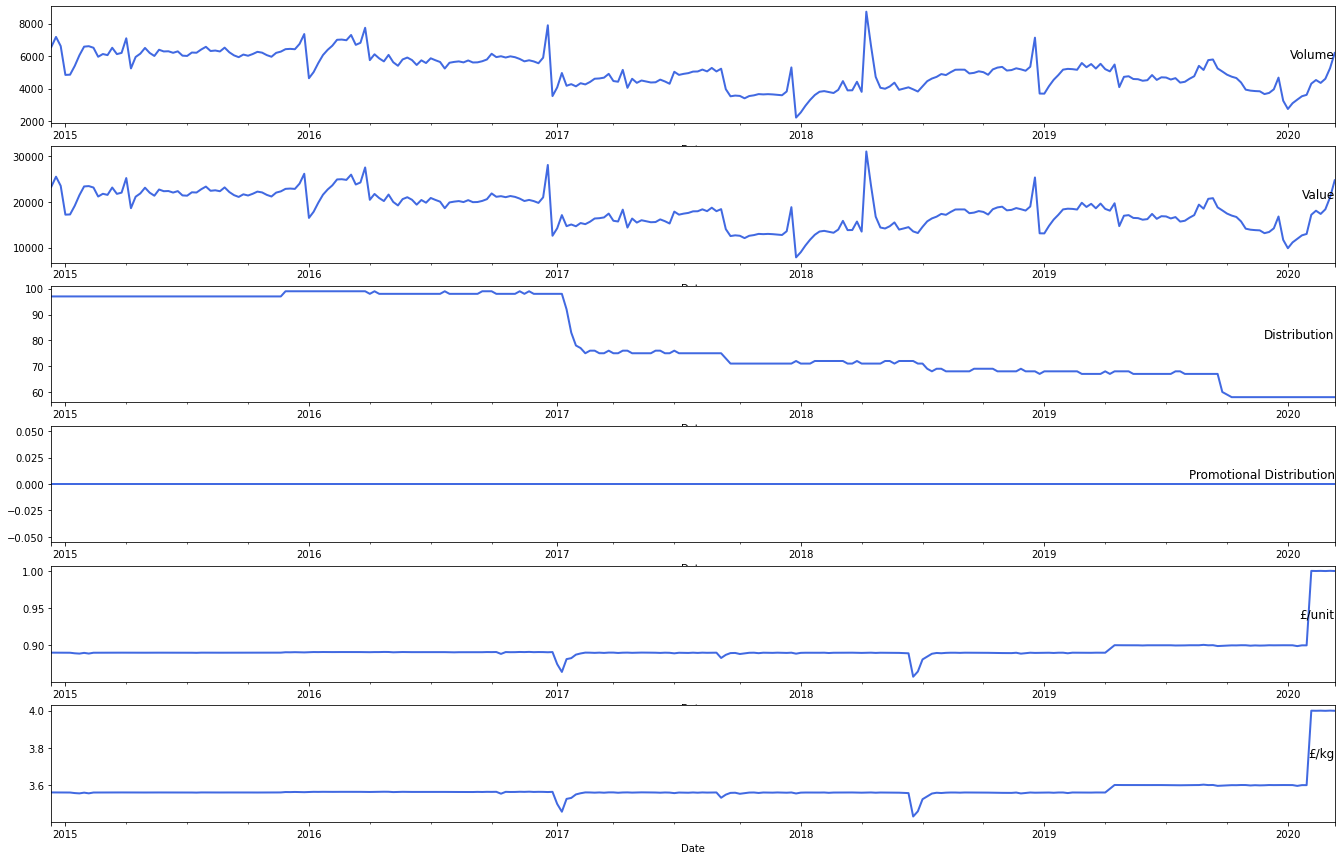

In [53]:
#plot each variable of the dataset
plot_data(mcv_dig_250g)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe603e4b0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6056dda58>)

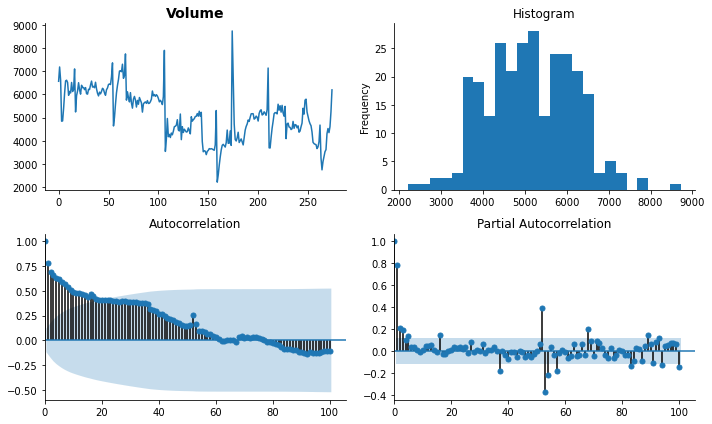

In [54]:
tsplot(mcv_dig_250g['Volume'].dropna(), title=mcv_dig_250g.columns[2], lags=100)


Test Statistic                  -2.635004
p-value                          0.085976
#Lags Used                       4.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


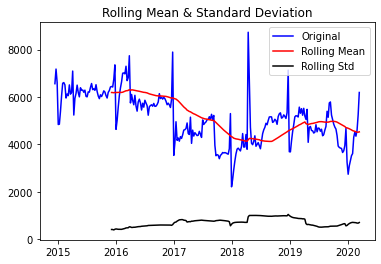

In [459]:
#check stationarity of the original dataset
plot(mcv_dig_250g)

Autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation. 

Since we got a relative large p-value, and the test statistic is not able to reject critical values at three levels; thus, we are not able to reject the null, we confirm that our dataset is not stationary.

Large number of time series models require stationarity of the dataset because if the dataset is not stationary, it will hard for the model to capture the trend, which will affect the accuracy of the future predictions. 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57ac31d198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57ac6f2358>)

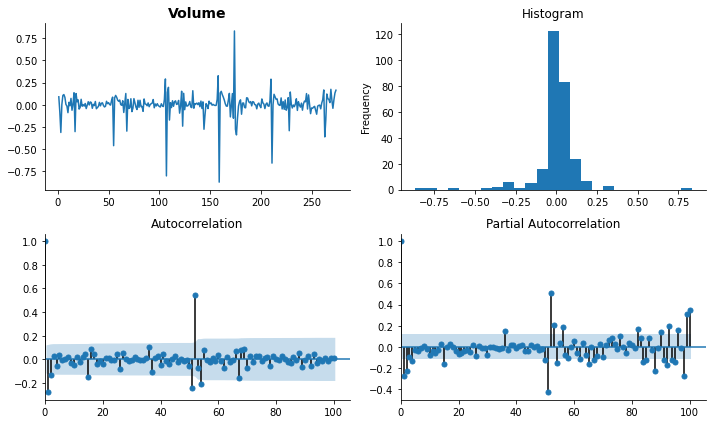

In [460]:
#plot stationary graph
series_transformed=mcv_dig_250g.copy()
series_transformed['Volume_transformed']=np.log(mcv_dig_250g.Volume).diff(1)
tsplot(series_transformed['Volume_transformed'].dropna(), title=mcv_dig_250g.columns[2], lags=100)


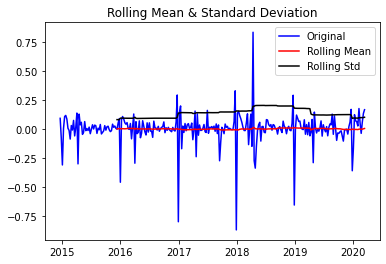

Results of Dickey-Fuller Test:
Test Statistic                -1.158473e+01
p-value                        2.885889e-21
#Lags Used                     3.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [461]:
plot_transform(mcv_dig_250g)

After transforming the dataset into stationary dataset, we see the p-value is extremely small, and the test statistic is smaller than critical values. And the autocorrelation is near zero.

### Modeling Part

      t-1     t+1
0     NaN  6563.0
1  6563.0  7179.8
2  7179.8  6617.0
3  6617.0  4842.8
4  4842.8  4856.0
Test MSE: 182400.603
Test RMSE: 427.084


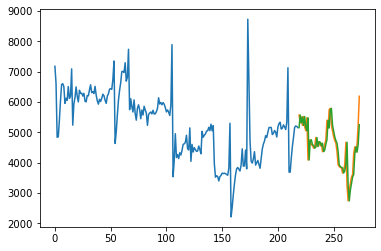

In [462]:
baseline_model(mcv_dig_250g)

When we deal with a time series dataset, we need to check the baseline model before applying any other models. By baseline model, it means we use the value at the previous time step (t-1) to predict the expected outcome at time step at t. It provides a point of reference for all other model techniques.

### Simple Exponential Smoothing model

Observations: 275
Training Observations: 220
Testing Observations: 55


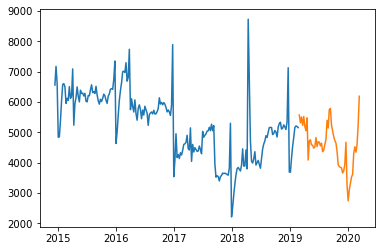

RMSE for Simple Exponential Smoothing α= 0.1 is: 811.71
RMSE for Simple Exponential Smoothing α= 0.2 is: 829.06
RMSE for Simple Exponential Smoothing α= 0.30000000000000004 is: 856.23
RMSE for Simple Exponential Smoothing α= 0.4 is: 886.98
RMSE for Simple Exponential Smoothing α= 0.5 is: 909.55
RMSE for Simple Exponential Smoothing α= 0.6000000000000001 is: 921.4
RMSE for Simple Exponential Smoothing α= 0.7000000000000001 is: 925.29
RMSE for Simple Exponential Smoothing α= 0.8 is: 924.87
RMSE for Simple Exponential Smoothing α= 0.9 is: 922.76


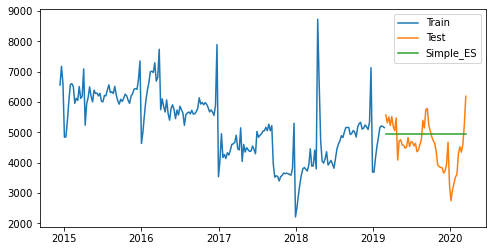

RMSE with the best simple exponential smoothing model parameter after log transformation generates: 791.58


In [463]:
ses_model(mcv_dig_250g)

Simple exponential smoothing: forecast future values using a weighted average of all previous values in the series.
Exponential smoothing is an intuitive forecasting method that weights the observed time series unequally. Recent observations are weighted more heavily than remote observations.

This model does not require stationarity of a dataset, so we apply the model with original data first to see the accuracy. 

### Holt's Linear Model

Holt's linear model can only capture the trend, not seasonality.

Observations: 275
Training Observations: 220
Testing Observations: 55
Min RMSE for Holt Linear Forecasting α= 0.6000000000000001 and β= 0.7000000000000001 is: 648.84


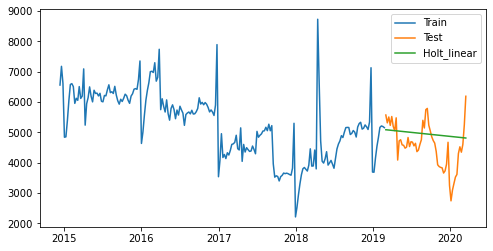

In [464]:
holt_linear_model(mcv_dig_250g)

### Re-apply the model by removing the seasonality through log & diff12

Observations: 275
Training Observations: 208
Testing Observations: 55


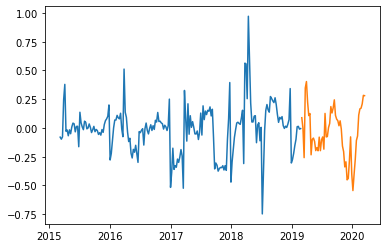

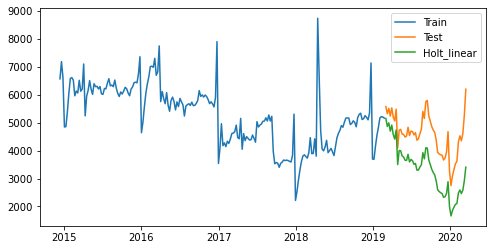

RMSE for Holt Linear Forecasting with transformation is: 1330.3488872235318


In [465]:
holt_linear_model_log(mcv_dig_250g)

### Holt-Winter Model

This model can capture both trend and seasonlity.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site

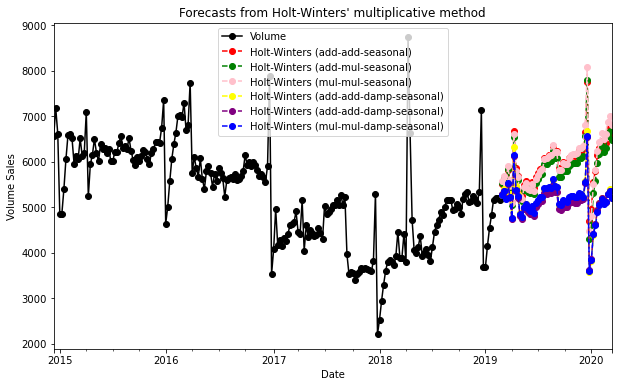

RMSE for Holt-winter are:
1601.368272725909
1480.0253146245254
1640.1381637006145
860.2219936997768
825.9719746331746
863.264280579266


In [466]:
holt_winter_model(mcv_dig_250g)

Tried all three models with original value/unstationary dataset (without transformation). We can see that the RMSE is actually getting smaller. 

From Simple exponential smoothing: 1012
to Holt's linear: 898
to Holt Winter's: 738.

This can prove that holt winter's is the one that can capture more information than they other two models.

We also apply stationary data (after taking log and differencing) on holt's linear model. We get a small RMSE. Even though the exponential smoothing series models do not require stationarity, but non-stationary dataset results can be misleading, and it is essential to have stationary dataset for the model to capture the information.

### Prophet Model

Facebook developed an open sourcing Prophet. Facebook provides prophet model not only can take care of some outliers/unusual values, but also it can take care of missing values. It is almost able to fully automatically forecast the trend of the future time series. 

Prophet can deal with missing observations or large outliers, and can roll with the punches in relation to product launches or marketing pushes.

Built in Stan, which is really fast.

Prophet needs a very specific kind of dataframe for it to work on. What we need is:

Date column as ds & Value column as y.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


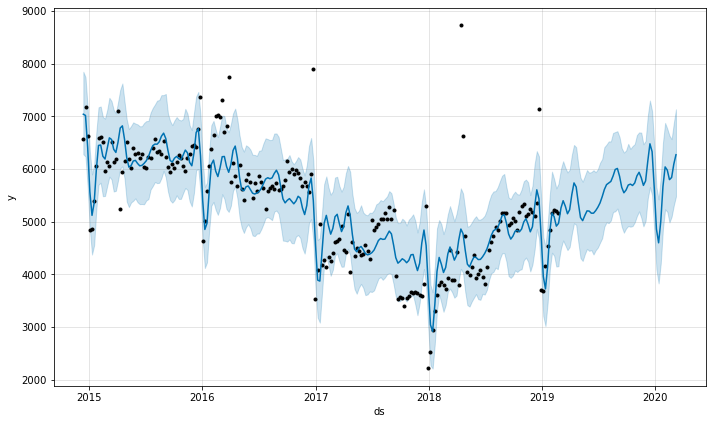

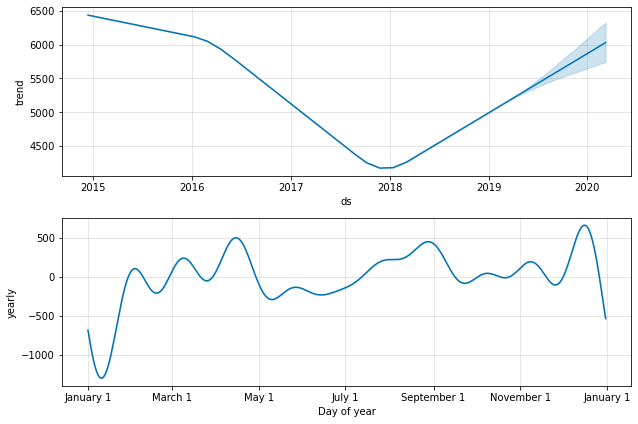

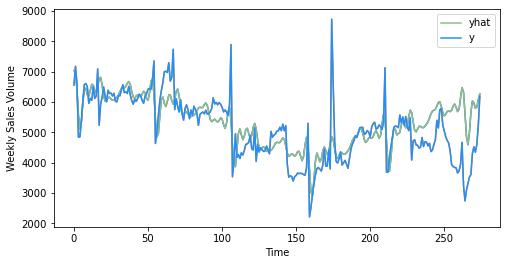

RMSE for prophet model is: 774.4738620997846


In [55]:
prophet_model(mcv_dig_250g)

The default mode for the prophet model is linear growth, we need to make some adjustments for that. 

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


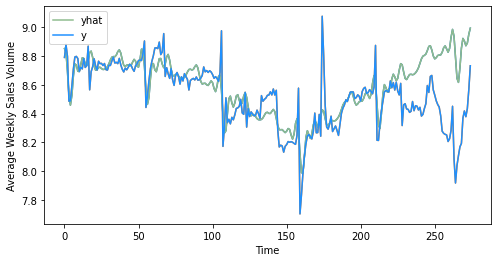

RMSE for prophet model after transformation is: 1103.3304092745504


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [56]:
prophet_model_log(mcv_dig_250g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                                        New Year's Day
1                           New Year Holiday [Scotland]
2                New Year Holiday [Scotland] (Observed)
3                  St. Patrick's Day [Northern Ireland]
4                                           Good Friday
5      Easter Monday [England, Wales, Northern Ireland]
6                                               May Day
7                                   Spring Bank Holiday
8                Battle of the Boyne [Northern Ireland]
9                        Summer Bank Holiday [Scotland]
10    Late Summer Bank Holiday [England, Wales, Nort...
11                          St. Andrew's Day [Scotland]
12                                        Christmas Day
13                             Christmas Day (Observed)
14                                           Boxing Day
15    New Year Holiday [Scotland], New Year's Day (O...
16      St. Patrick's Day [Northern Ireland] (Observed)
17                                Boxing Day (Ob

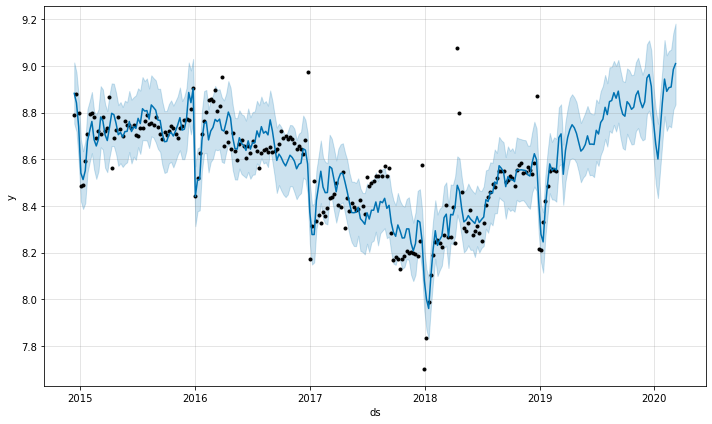

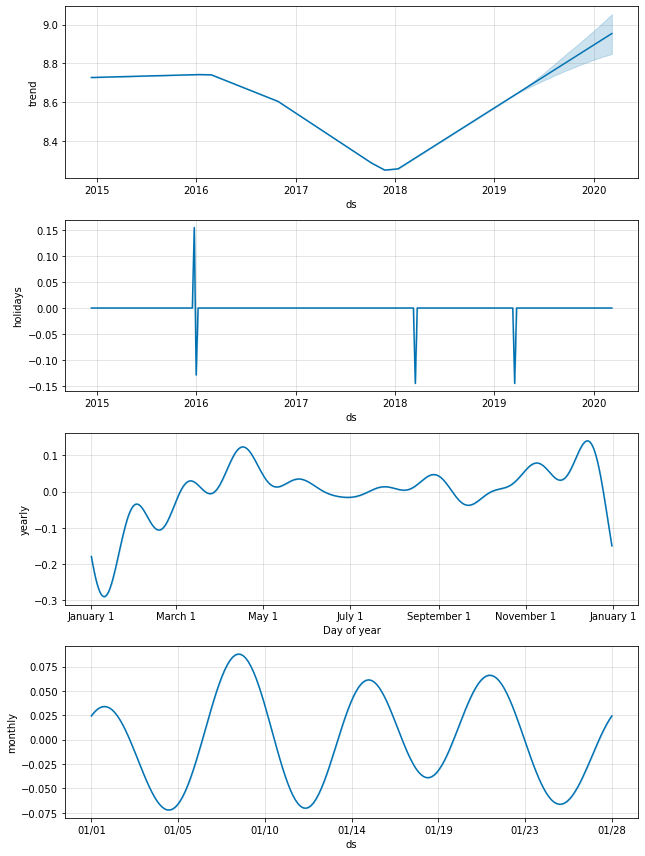

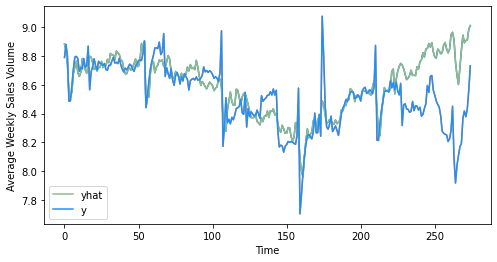

RMSE for prophet with transformation and holiday is: 1111.9139427141167


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [57]:
prophet_log_season(mcv_dig_250g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


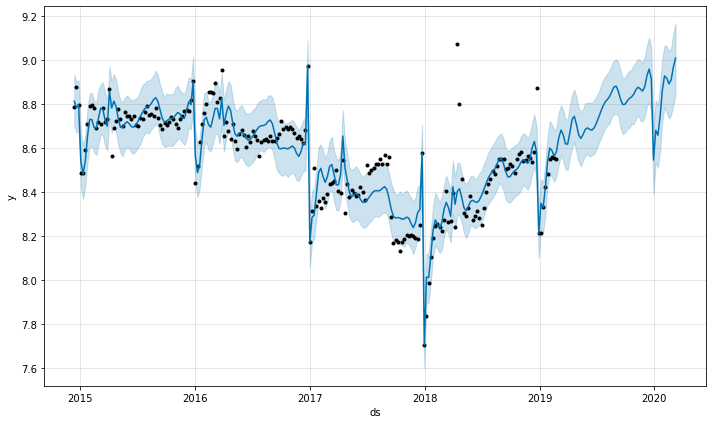

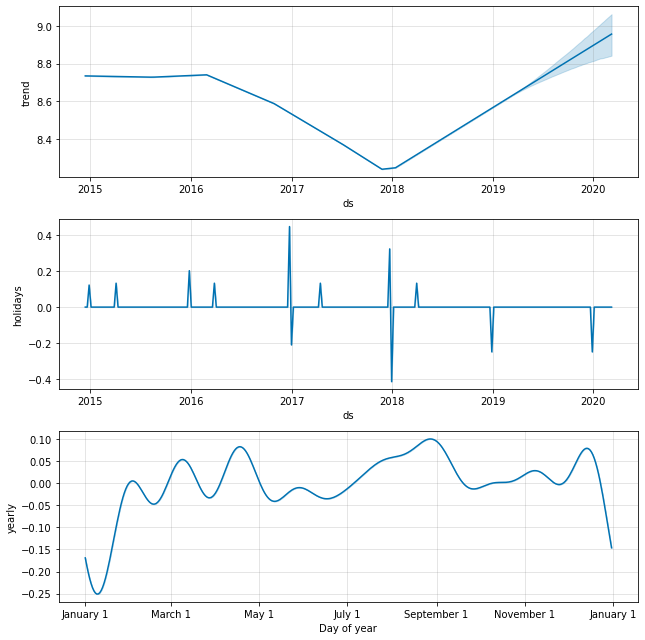

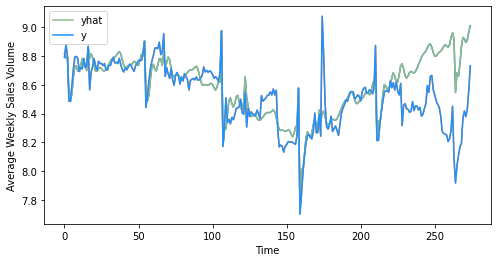

1090.6728197671898


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [372]:
prophet_log_two_holiday(mcv_dig_250g)

### Variables Analysis

In [92]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")


In [93]:
def data(x):
    train_size = int(len(x) * 0.8)
    x=x[:train_size]
#     prediction_size=int(len(prophet_log[train_size:]))
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

mcv_dig_250g=data(mcv_dig_250g)
mcv_dig_400g=data(mcv_dig_400g)
mcv_dig_400g_twin=data(mcv_dig_400g_twin)
mcv_rt_300g=data(mcv_rt_300g)
mcv_rt_300g_twin=data(mcv_rt_300g_twin)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_250g')

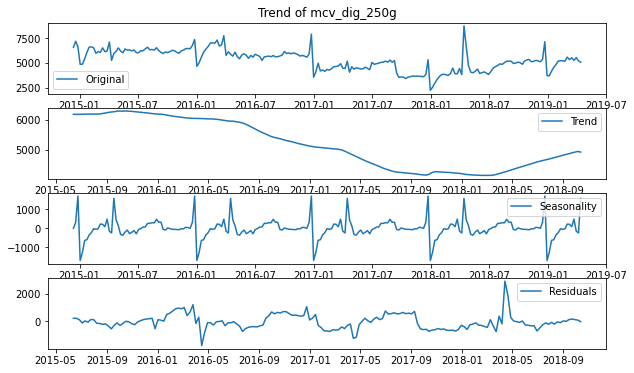

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g')

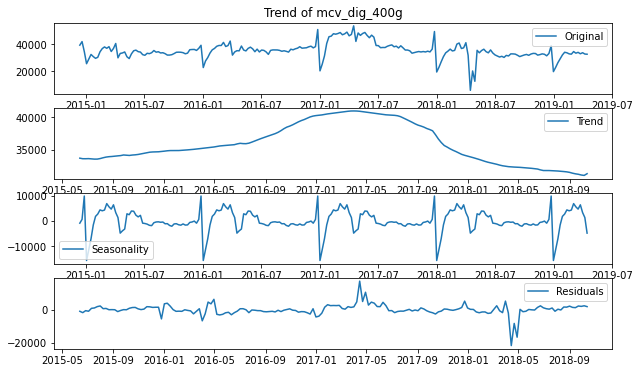

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g_twin')

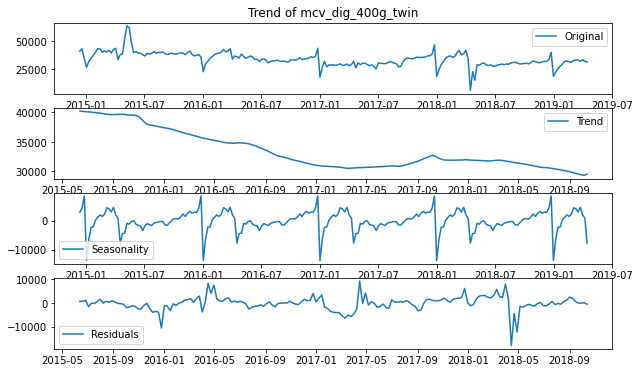

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g')

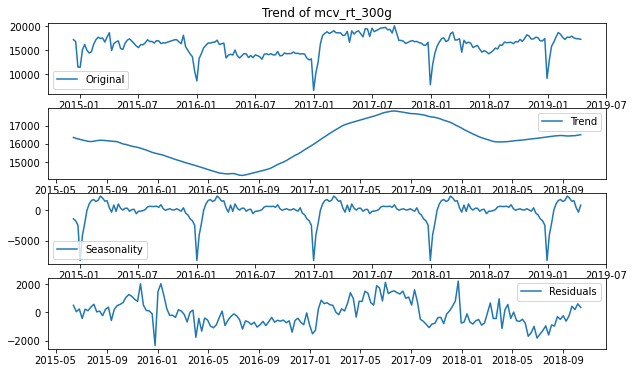

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g_twin')

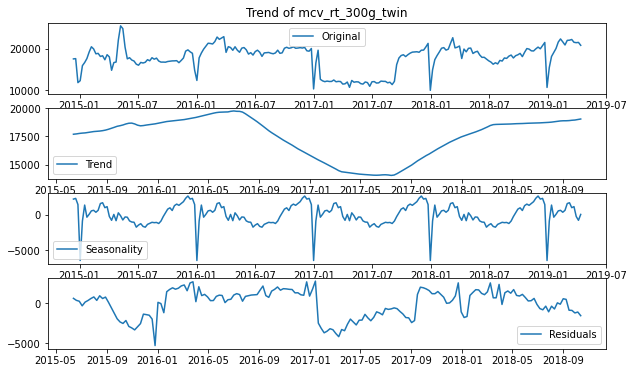

In [94]:
#decomposition for pladis products
from statsmodels.tsa.seasonal import seasonal_decompose

mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]
mcv_name=['mcv_dig_250g','mcv_dig_400g','mcv_dig_400g_twin','mcv_rt_300g','mcv_rt_300g_twin']


i=0
for df in mcv_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_name[i] )
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()
    i=i+1


In [95]:
#把自己产品和我们产品放在一起比较trend
#competitors products
tes_dig_400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tes_rt_250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tes_mill_400g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tes_rt_300g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [96]:
tes_rt_300g = tes_rt_300g.dropna()
tes_mill_400g = tes_mill_400g.dropna()

In [97]:
tes_rt_300g

,SDESC,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg
130,WE 10.06.17,3674.0,1102.2,1103.6,56.0,0.0,0.300381,1.001270
131,WE 17.06.17,44771.0,13431.3,13442.5,98.0,0.0,0.300250,1.000834
132,WE 24.06.17,56931.0,17079.3,17092.8,100.0,0.0,0.300237,1.000790
133,WE 01.07.17,73620.0,22086.0,22102.7,100.0,0.0,0.300227,1.000756
134,WE 08.07.17,72654.0,21796.2,21813.8,100.0,0.0,0.300242,1.000807
...,...,...,...,...,...,...,...,...
279,WE 18.04.20,2863.0,858.9,858.9,21.0,0.0,0.300000,1.000000
280,WE 25.04.20,78670.0,23601.0,23600.3,82.0,0.0,0.299991,0.999970
281,WE 02.05.20,105314.0,31594.2,31593.8,83.0,0.0,0.299996,0.999987
282,WE 09.05.20,100593.0,30177.9,30176.9,83.0,0.0,0.299990,0.999967


In [98]:
#competitors' products !!!!!!这里改 不要只要sales
tes_dig_400g=data(tes_dig_400g)
tes_mill_400g=data(tes_mill_400g)
tes_rt_250g=data(tes_rt_250g)
tes_rt_300g=data(tes_rt_300g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
tes_mill_400g #怎么只有volume了。。。。。

,Volume
Date,
2018-10-13,163.2
2018-10-20,6549.2
2018-10-27,9401.2
2018-11-03,10259.2
2018-11-10,10667.6
...,...
2019-12-21,22123.6
2019-12-28,13310.4
2020-01-04,12376.4


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

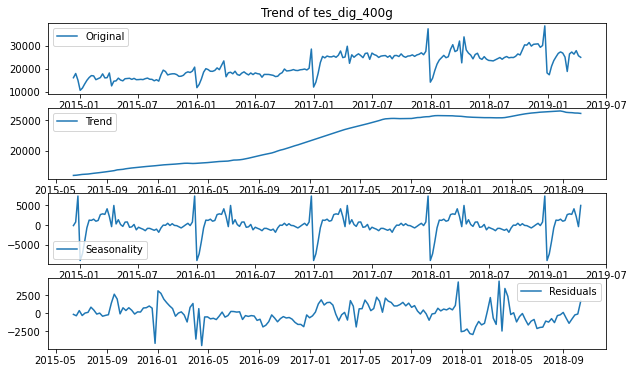

No enough datapoints for plotting the complete graphs


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

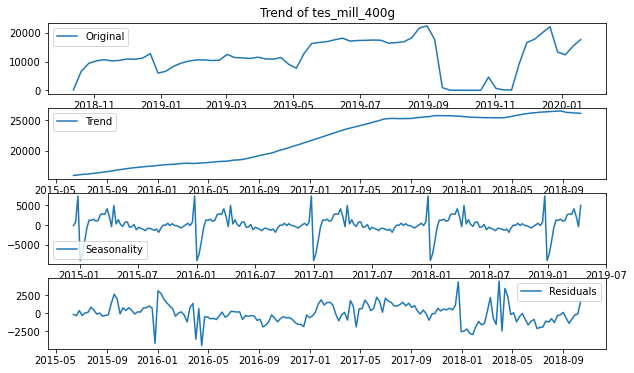

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

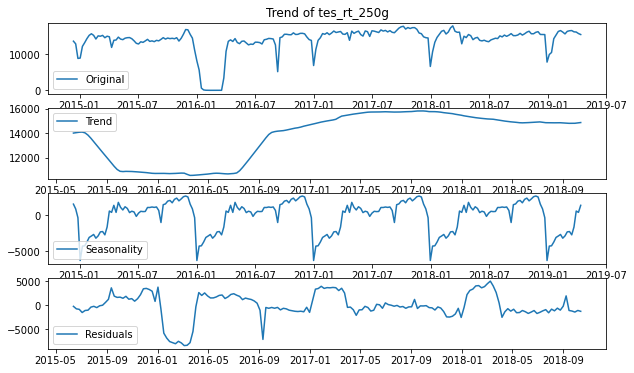

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

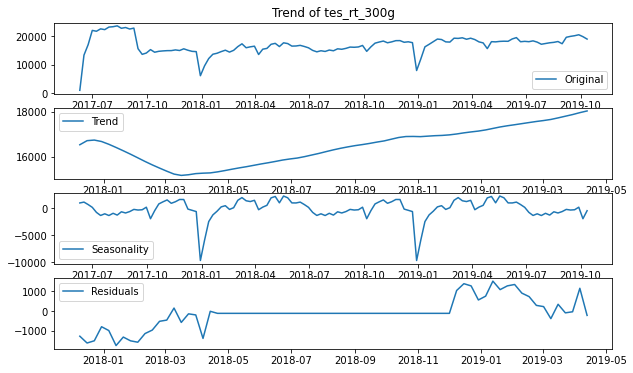

In [100]:
#decompose competitors' products trends
from statsmodels.tsa.seasonal import seasonal_decompose

tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
tes_name=['tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']

i=0
for df in tes_list:
    try:
        decomposition=seasonal_decompose(df)
    except ValueError:
        print('No enough datapoints for plotting the complete graphs')
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.title('Trend of ' + tes_name[i] )
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()
    i=i+1

#### Compare trends with Pladis product and competitors' product

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

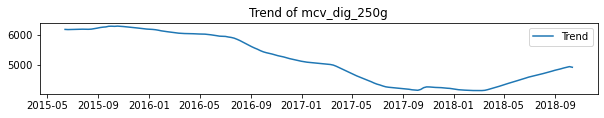

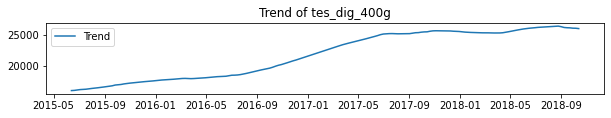

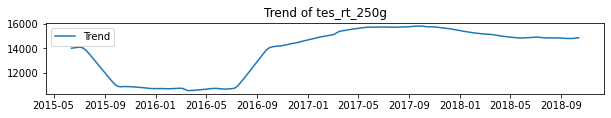

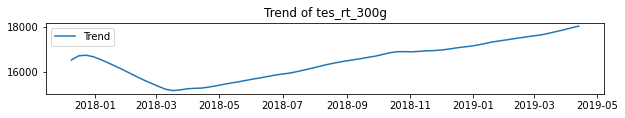

In [101]:
mcv_dig_250g_competitor=[mcv_dig_250g,tes_dig_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_250g_competitor_list=['mcv_dig_250g','tes_dig_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_competitor=[mcv_dig_400g,tes_dig_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_competitor_list=['mcv_dig_400g','tes_dig_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_twin_competitor=[mcv_dig_400g_twin,tes_dig_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_twin_competitor_list=['mcv_dig_400g_twin','tes_dig_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_competitor=[mcv_rt_300g,tes_dig_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_competitor_list=['mcv_rt_300g','tes_dig_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_twin_competitor=[mcv_rt_300g_twin,tes_dig_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_twin_competitor_list=['mcv_rt_300g_twin','tes_dig_400g','tes_rt_250g','tes_rt_300g']

product_name=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
             'mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g'
             ]

i=0
for product in mcv_dig_250g_competitor:
    decomposition=seasonal_decompose(product)
    trend_1=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_1, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_250g_competitor_list[i] )
    i=i+1
    

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

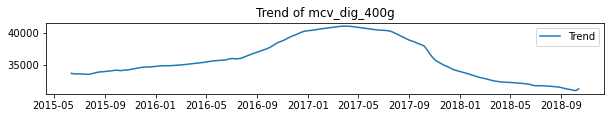

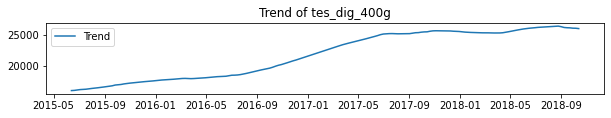

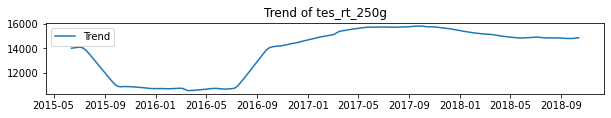

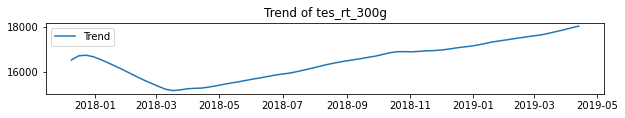

In [102]:
i=0
for product in mcv_dig_400g_competitor:
    decomposition=seasonal_decompose(product)
    trend_2=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_2, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

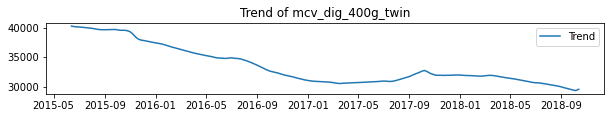

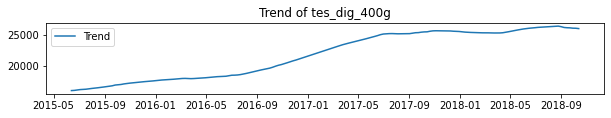

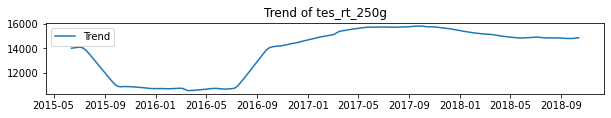

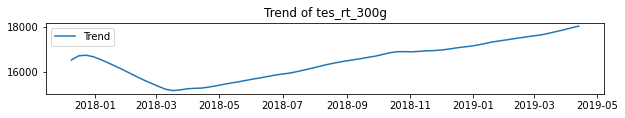

In [103]:
i=0
for product in mcv_dig_400g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_3=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_3, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_twin_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

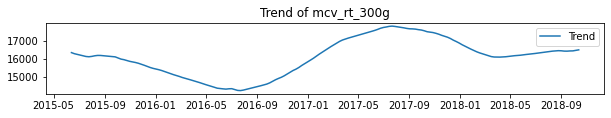

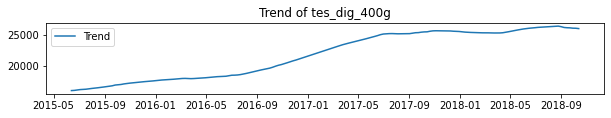

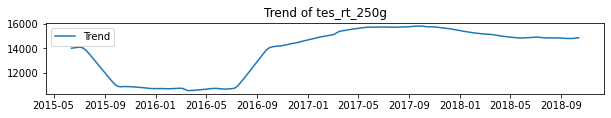

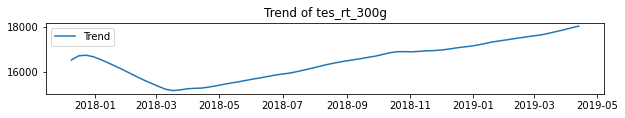

In [104]:
i=0
for product in mcv_rt_300g_competitor:
    decomposition=seasonal_decompose(product)
    trend_4=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_4, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

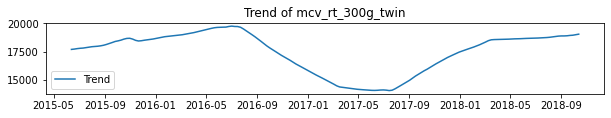

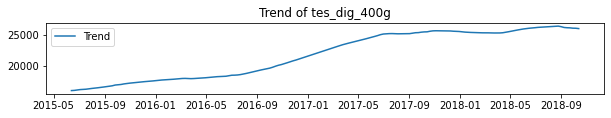

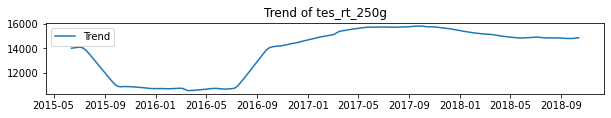

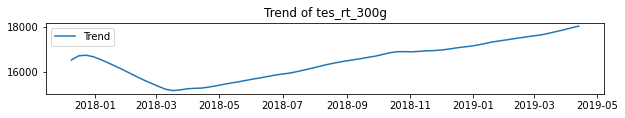

In [105]:
i=0
for product in mcv_rt_300g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_5=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_5, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_twin_competitor_list[i])
    i=i+1

In [106]:
decomposition_1=seasonal_decompose(mcv_dig_250g)
trend_1=decomposition_1.trend
trend_1=trend_1.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

# # datapoints are less than 104 observations
# comp_decomposition_2=seasonal_decompose(tes_mill_400g)
# comp_trend2=comp_decomposition_2.trend
# comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_250g=pd.merge(trend_1,comp_trend1, how='left', on='Date')
# mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend2, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend3, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend4, how='left', on='Date')
mcv_dig_250g.columns=['trend', 'competitor_trend1','competitor_trend3','competitor_trend4']

mcv_dig_250g.corr()

,trend,competitor_trend1,competitor_trend3,competitor_trend4
trend,1.000000,-0.961726,-0.890605,0.537090
competitor_trend1,-0.961726,1.000000,0.843712,0.509484
competitor_trend3,-0.890605,0.843712,1.000000,0.116294
competitor_trend4,0.537090,0.509484,0.116294,1.000000


In [109]:
decomposition_2=seasonal_decompose(mcv_dig_400g)
trend_2=decomposition_2.trend
trend_2=trend_2.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

# comp_decomposition_2=seasonal_decompose(tes_mill_400g)
# comp_trend2=comp_decomposition_2.trend
# comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_400g_comp=pd.merge(trend_2,comp_trend1, how='left', on='Date')
# mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend2, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend3, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend4, how='left', on='Date')
mcv_400g_comp.columns=['trend', 'competitor_trend1','competitor_trend3','competitor_trend4']

mcv_400g_comp.corr()

,trend,competitor_trend1,competitor_trend3,competitor_trend4
trend,1.000000,-0.005451,0.241459,-0.026484
competitor_trend1,-0.005451,1.000000,0.843712,0.509484
competitor_trend3,0.241459,0.843712,1.000000,0.116294
competitor_trend4,-0.026484,0.509484,0.116294,1.000000


In [110]:
decomposition_3=seasonal_decompose(mcv_dig_400g_twin)
trend_3=decomposition_3.trend
trend_3=trend_3.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

# comp_decomposition_2=seasonal_decompose(tes_mill_400g)
# comp_trend2=comp_decomposition_2.trend
# comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_400g_twin_comp=pd.merge(trend_3,comp_trend1, how='left', on='Date')
# mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend2, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend3, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend4, how='left', on='Date')
mcv_dig_400g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend3','competitor_trend4']

mcv_dig_400g_twin_comp.corr()

,trend,competitor_trend1,competitor_trend3,competitor_trend4
trend,1.000000,-0.878479,-0.751982,-0.504305
competitor_trend1,-0.878479,1.000000,0.843712,0.509484
competitor_trend3,-0.751982,0.843712,1.000000,0.116294
competitor_trend4,-0.504305,0.509484,0.116294,1.000000


In [111]:
decomposition_4=seasonal_decompose(mcv_rt_300g)
trend_4=decomposition_4.trend
trend_4=trend_4.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

# comp_decomposition_2=seasonal_decompose(tes_mill_400g)
# comp_trend2=comp_decomposition_2.trend
# comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_comp=pd.merge(trend_4,comp_trend1, how='left', on='Date')
# mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_comp.columns=['trend', 'competitor_trend1','competitor_trend3','competitor_trend4']


mcv_rt_300g_comp.corr()

,trend,competitor_trend1,competitor_trend3,competitor_trend4
trend,1.000000,0.672860,0.773499,0.798651
competitor_trend1,0.672860,1.000000,0.843712,0.509484
competitor_trend3,0.773499,0.843712,1.000000,0.116294
competitor_trend4,0.798651,0.509484,0.116294,1.000000


In [112]:
#mcv_rt_300g_twin trend correlation
decomposition_5=seasonal_decompose(mcv_rt_300g_twin)
trend_5=decomposition_5.trend
trend_5=trend_5.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

# comp_decomposition_2=seasonal_decompose(tes_mill_400g)
# comp_trend2=comp_decomposition_2.trend
# comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_twin_comp=pd.merge(trend_5,comp_trend1, how='left', on='Date')
# mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend3','competitor_trend4']

mcv_rt_300g_twin_comp.corr()

,trend,competitor_trend1,competitor_trend3,competitor_trend4
trend,1.000000,-0.400711,-0.668711,-0.173531
competitor_trend1,-0.400711,1.000000,0.843712,0.509484
competitor_trend3,-0.668711,0.843712,1.000000,0.116294
competitor_trend4,-0.173531,0.509484,0.116294,1.000000


## Machine Learning Model

In [220]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

tesco_digs400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tesco_molly400g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tesco_RT250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tesco_RT300g=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [221]:
#extract own product variables
def variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['Volume','£/kg','Distribution','Promotional Distribution']]
    return x

mcv_dig_250g=variables(mcv_dig_250g)
mcv_dig_400g=variables(mcv_dig_400g)
mcv_dig_400g_twin=variables(mcv_dig_400g_twin)
mcv_rt_300g=variables(mcv_rt_300g)
mcv_rt_300g_twin=variables(mcv_rt_300g_twin)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
def comp_variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
#     x=x.dropna(subset=['Volume'])
    x=x[['£/kg','Distribution']]
    return x

tesco_RT250g=comp_variables(tesco_RT250g)
tesco_molly400g=comp_variables(tesco_molly400g)
tesco_RT300g=comp_variables(tesco_RT300g)
tesco_digs400g=comp_variables(tesco_digs400g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
# each variable with their competitors
# merge own product variables with four competitors' variables

In [224]:
# compose competitors' variables as a list

competitor_list=[tesco_RT250g, tesco_molly400g, tesco_RT300g, tesco_digs400g]

variable_columns=['Volume','£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]

In [225]:
# mcv_dig_250g product
for variable in competitor_list:
    mcv_dig_250g=mcv_dig_250g.merge(variable, how='left', on='Date')
    mcv_dig_250g_with_comp=mcv_dig_250g
    
mcv_dig_250g_with_comp.columns=variable_columns
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,6563.0,3.560262,97,0,2.000897,98,NaN,NaN,NaN,NaN,1.475527,99
2014-12-20,7179.8,3.560043,97,0,2.000794,98,NaN,NaN,NaN,NaN,1.475431,99
2014-12-27,6617.0,3.560118,97,0,2.000896,98,NaN,NaN,NaN,NaN,1.475346,99
2015-01-03,4842.8,3.560110,97,0,2.000998,98,NaN,NaN,NaN,NaN,1.475504,99
2015-01-10,4856.0,3.559761,97,0,2.001020,98,NaN,NaN,NaN,NaN,1.475625,99


In [226]:
#drop all nan and drop only molly
mcv_dig_250g_with_comp=mcv_dig_250g_with_comp.dropna()
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2018-10-13,4850.3,3.559244,69,0,2.241567,100,0.775123,14.0,0.999896,83.0,1.125344,99
2018-10-20,5179.0,3.558718,69,0,2.241541,100,0.775011,57.0,0.999892,83.0,1.125224,99
2018-10-27,5293.5,3.557684,68,0,2.241566,100,0.774954,57.0,0.999978,83.0,1.125292,99
2018-11-03,5335.8,3.558061,68,0,2.241457,100,0.775021,57.0,0.999962,83.0,1.125552,99
2018-11-10,5111.3,3.557921,68,0,2.241417,100,0.774982,58.0,0.999921,83.0,1.125193,99


In [192]:
mcv_dig_250g_with_comp=mcv_dig_250g_with_comp.dropna(axis=1)
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,
2014-12-13,6563.0,3.560262,97,0,2.000897,98,1.475527,99
2014-12-20,7179.8,3.560043,97,0,2.000794,98,1.475431,99
2014-12-27,6617.0,3.560118,97,0,2.000896,98,1.475346,99
2015-01-03,4842.8,3.560110,97,0,2.000998,98,1.475504,99
2015-01-10,4856.0,3.559761,97,0,2.001020,98,1.475625,99


In [129]:
# mcv_dig_400g product
for variable in competitor_list:
    mcv_dig_400g=mcv_dig_400g.merge(variable, how='left', on='Date')
    mcv_dig_400g_with_comp=mcv_dig_400g
    
mcv_dig_400g_with_comp.columns=variable_columns
mcv_dig_400g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,39173.5,2.032399,100,0,2.000897,98,NaN,NaN,NaN,NaN,1.475527,99
2014-12-20,41784.0,2.033989,100,0,2.000794,98,NaN,NaN,NaN,NaN,1.475431,99
2014-12-27,34446.5,2.042324,100,0,2.000896,98,NaN,NaN,NaN,NaN,1.475346,99
2015-01-03,25516.0,2.040269,100,0,2.000998,98,NaN,NaN,NaN,NaN,1.475504,99
2015-01-10,28874.5,2.039523,100,0,2.001020,98,NaN,NaN,NaN,NaN,1.475625,99


In [130]:
#mcv_dig_400g_twin product
for variable in competitor_list:
    mcv_dig_400g_twin=mcv_dig_400g_twin.merge(variable, how='left', on='Date')
    mcv_dig_400g_twin_with_comp=mcv_dig_400g_twin
    
mcv_dig_400g_twin_with_comp.columns=variable_columns
mcv_dig_400g_twin_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,40945.0,1.889672,96,0,2.000897,98,NaN,NaN,NaN,NaN,1.475527,99
2014-12-20,43265.0,1.889613,96,0,2.000794,98,NaN,NaN,NaN,NaN,1.475431,99
2014-12-27,34195.0,1.889703,96,0,2.000896,98,NaN,NaN,NaN,NaN,1.475346,99
2015-01-03,26667.0,1.889601,96,0,2.000998,98,NaN,NaN,NaN,NaN,1.475504,99
2015-01-10,31957.0,1.889689,96,0,2.001020,98,NaN,NaN,NaN,NaN,1.475625,99


In [131]:
#mcv_rt_300g product
for variable in competitor_list:
    mcv_rt_300g=mcv_rt_300g.merge(variable, how='left', on='Date')
    mcv_rt_300g_with_comp=mcv_rt_300g
    
mcv_rt_300g_with_comp.columns=variable_columns
mcv_rt_300g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17259.3,3.384627,100,0,2.000897,98,NaN,NaN,NaN,NaN,1.475527,99
2014-12-20,16830.9,3.386913,100,0,2.000794,98,NaN,NaN,NaN,NaN,1.475431,99
2014-12-27,11520.9,3.399665,100,0,2.000896,98,NaN,NaN,NaN,NaN,1.475346,99
2015-01-03,11492.4,3.396514,100,0,2.000998,98,NaN,NaN,NaN,NaN,1.475504,99
2015-01-10,15084.9,3.396960,100,0,2.001020,98,NaN,NaN,NaN,NaN,1.475625,99


In [132]:
#mcv_rt_300g_twin product
for variable in competitor_list:
    mcv_rt_300g_twin=mcv_rt_300g_twin.merge(variable, how='left', on='Date')
    mcv_rt_300g_twin_with_comp=mcv_rt_300g_twin
    
mcv_rt_300g_twin_with_comp.columns=variable_columns
mcv_rt_300g_twin_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17512,3.15,96,0,2.000897,98,NaN,NaN,NaN,NaN,1.475527,99
2014-12-20,17578,3.15,96,0,2.000794,98,NaN,NaN,NaN,NaN,1.475431,99
2014-12-27,11776,3.15,96,0,2.000896,98,NaN,NaN,NaN,NaN,1.475346,99
2015-01-03,12239,3.15,96,0,2.000998,98,NaN,NaN,NaN,NaN,1.475504,99
2015-01-10,15878,3.15,96,0,2.001020,98,NaN,NaN,NaN,NaN,1.475625,99


In [243]:
# var_list=[mcv_dig_250g_with_comp,mcv_dig_400g_with_comp,mcv_dig_400g_twin_with_comp,mcv_rt_300g_with_comp,mcv_rt_300g_twin_with_comp]

# var_name=['mcv_dig_250g_with_comp','mcv_dig_400g_with_comp','mcv_dig_400g_twin_with_comp','mcv_rt_300g_with_comp','mcv_rt_300g_twin_with_comp']

# final_var_list=[mcv_dig_250g_with_comp_X,mcv_dig_250g_with_comp_y,
#                mcv_dig_400g_with_comp_X,mcv_dig_400g_with_comp_y,
#                mcv_dig_400g_twin_with_comp_X, mcv_dig_400g_twin_with_comp_y,
#                 mcv_rt_300g_with_comp_X, mcv_rt_300g_with_comp_y,
#                 mcv_rt_300g_twin_with_comp_X, mcv_rt_300g_twin_with_comp_y
#                ]


### Random Forest Regressor

In [193]:
def input_var(var):
#     for var in final_var_list:
    X=var[['£/kg','Distribution','Promotional Distribution',
               'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
#                'tesco_molly400g_price_kg','tesco_molly400g_distribution',
#                'tesco_RT300g_price_kg','tesco_RT300g_distribution',
               'tesco_digs400g_price_kg','tesco_dig400g_distribution'
              ]].values
    y=var['Volume'].values
    return X,y


In [167]:
#train test split
from sklearn.model_selection import TimeSeriesSplit

def rf_regressor(X, y):
    splits = TimeSeriesSplit(n_splits=5)

    for train_index, test_index in splits.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print('Observations: %d' % (len(train_index) + len(test_index)))
        print('Training Observations: %d' % (len(train_index))) 
        print('Testing Observations: %d' % (len(test_index))) 
        from sklearn.preprocessing import StandardScaler

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        from sklearn.ensemble import RandomForestRegressor
        from sklearn.model_selection import cross_val_score

        regressor = RandomForestRegressor(n_estimators=20, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        print(cross_val_score(regressor, X_train, y_train, cv=splits))

        from sklearn import metrics

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    #     x_len=len(train_index)
    #     mcv_dig_250g_with_comp['pred_volume']=""
    #     mcv_dig_250g_with_comp['pred_volume'][x_len:]=y_pred

    #     plt.figure(figsize=(23,8))


    #     plt.plot(X, label='Train')
    #     plt.plot(y, label='Test')
    #     plt.plot(mcv_dig_250g_with_comp['pred_volume'], label='Random Forest Predicted Sales')
    #     plt.title('Random Forest Predicted Result', size = 30)
    #     plt.ylabel('Sales',size=20)
    #     plt.xlabel('Date',size=20)
    #     plt.legend(loc='best')
    #     plt.show()

        #feature importance
        df_featImp = pd.DataFrame({'features':['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'], 'importance': regressor.feature_importances_})
        df_featImp = df_featImp.sort_values('importance').reset_index(drop=True)

        plt.figure()
        df_featImp.plot(kind='barh', x='features', y='importance', title="Feature Importance for Volume Sales",legend=False, figsize=(15, 8))

In [168]:
mcv_dig_250g_input_X,mcv_dig_250g_input_Y=input_var(mcv_dig_250g_with_comp)


Observations: 95
Training Observations: 50
Testing Observations: 45
[ 0.13036195 -5.56151621 -7.09212398 -3.41984288 -0.02894645]
Mean Absolute Error: 576.934777777778
Mean Squared Error: 448249.29267833364
Root Mean Squared Error: 669.5142214160455
Observations: 140
Training Observations: 95
Testing Observations: 45
[-10.91565241  -3.77018986  -0.08855438   0.17048327  -0.82273536]
Mean Absolute Error: 1224.9057777777784
Mean Squared Error: 1941321.6683300026
Root Mean Squared Error: 1393.3131982185494
Observations: 185
Training Observations: 140
Testing Observations: 45
[-13.50741863  -0.09664908  -3.7439571   -0.71197983  -0.62484937]
Mean Absolute Error: 1194.2717777777784
Mean Squared Error: 1832907.550926668
Root Mean Squared Error: 1353.8491610687906
Observations: 230
Training Observations: 185
Testing Observations: 45
[-0.09761472 -0.06580052 -1.28856927 -0.9856435  -0.10368009]
Mean Absolute Error: 973.0416666666663
Mean Squared Error: 1527253.7221694433
Root Mean Squared Erro

<Figure size 432x288 with 0 Axes>

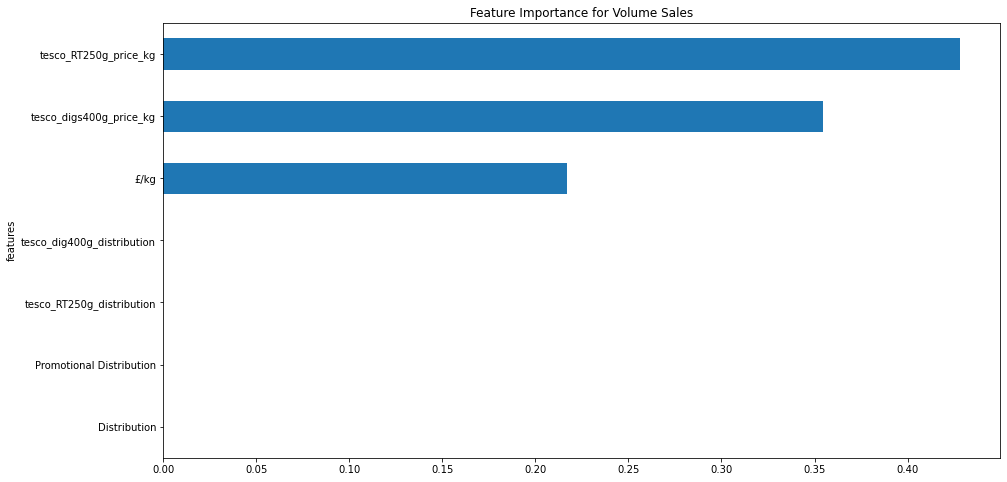

<Figure size 432x288 with 0 Axes>

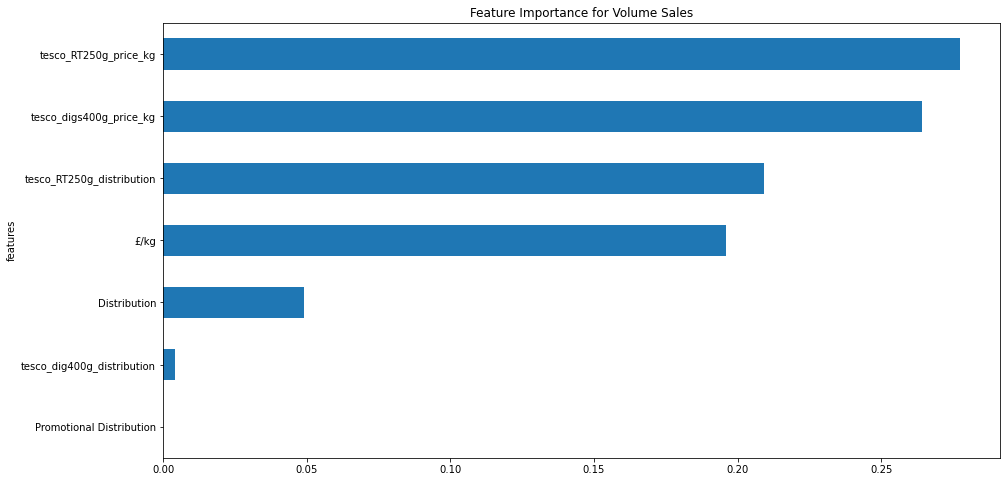

<Figure size 432x288 with 0 Axes>

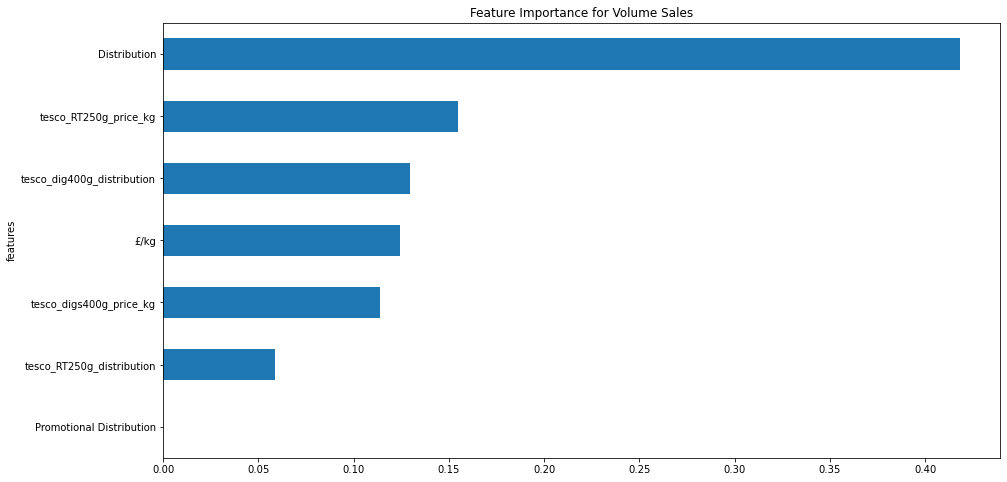

<Figure size 432x288 with 0 Axes>

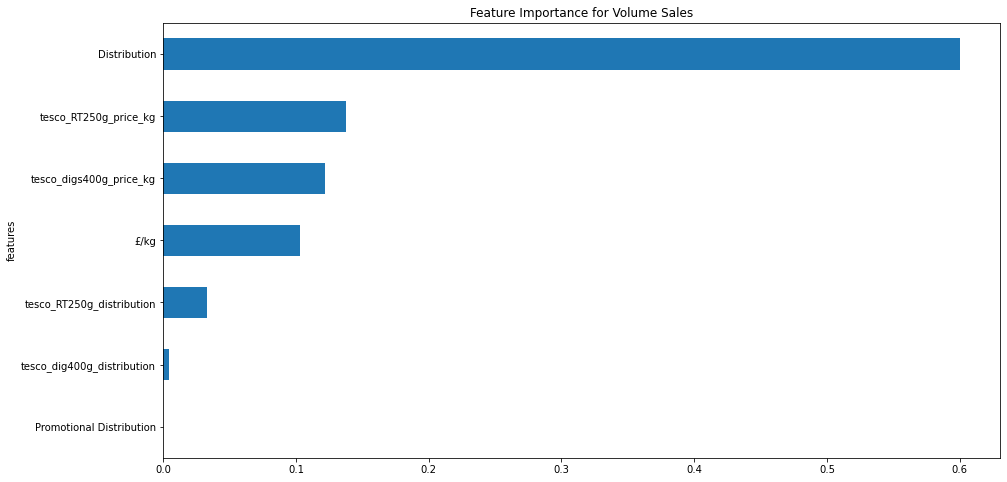

<Figure size 432x288 with 0 Axes>

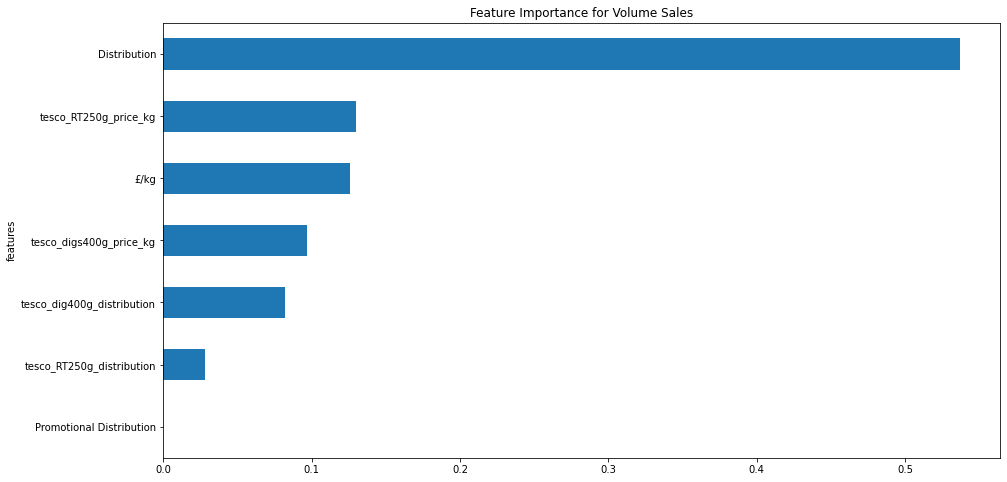

In [159]:
#drop columns
rf_regressor(mcv_dig_250g_input_X,mcv_dig_250g_input_Y)

Observations: 27
Training Observations: 15
Testing Observations: 12
[-2.00370478e+00 -4.69391908e+00 -1.31595592e+00 -4.67285514e+05
 -2.95149127e+01]
Mean Absolute Error: 516.6966666666673
Mean Squared Error: 369187.48274166725
Root Mean Squared Error: 607.6080008868113
Observations: 39
Training Observations: 27
Testing Observations: 12
[ -0.38235886 -18.99612119 -15.35474813  -0.33948351  -0.11387804]
Mean Absolute Error: 785.684166666667
Mean Squared Error: 732819.5746583341
Root Mean Squared Error: 856.0488155814096
Observations: 51
Training Observations: 39
Testing Observations: 12
[-0.10270072 -7.76042914 -0.31665956 -4.35586734  0.11818217]
Mean Absolute Error: 399.5049999999996
Mean Squared Error: 268263.3730958328
Root Mean Squared Error: 517.9414765162497
Observations: 63
Training Observations: 51
Testing Observations: 12
[-2.67212521 -0.19324155 -6.25551438 -1.21142672 -1.9176948 ]
Mean Absolute Error: 942.3358333333346
Mean Squared Error: 1084926.5742625026
Root Mean Square

<Figure size 432x288 with 0 Axes>

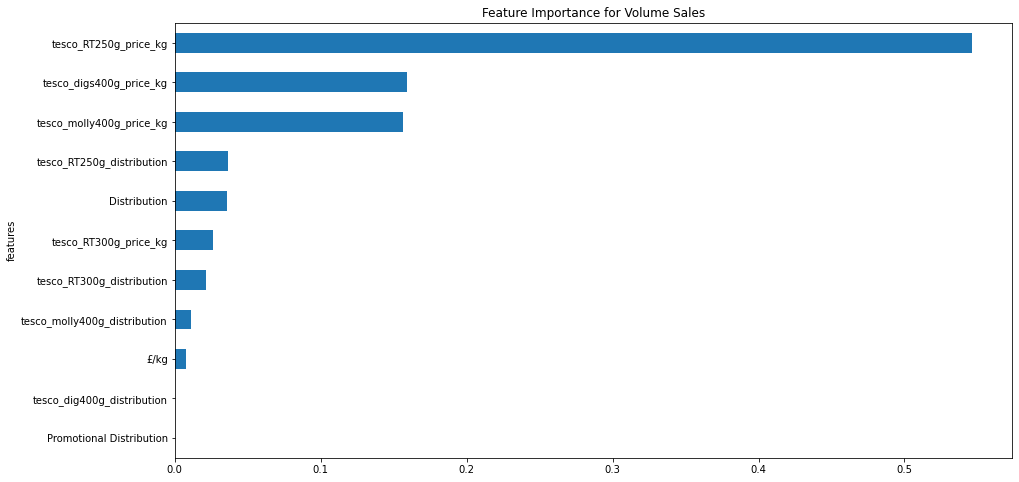

<Figure size 432x288 with 0 Axes>

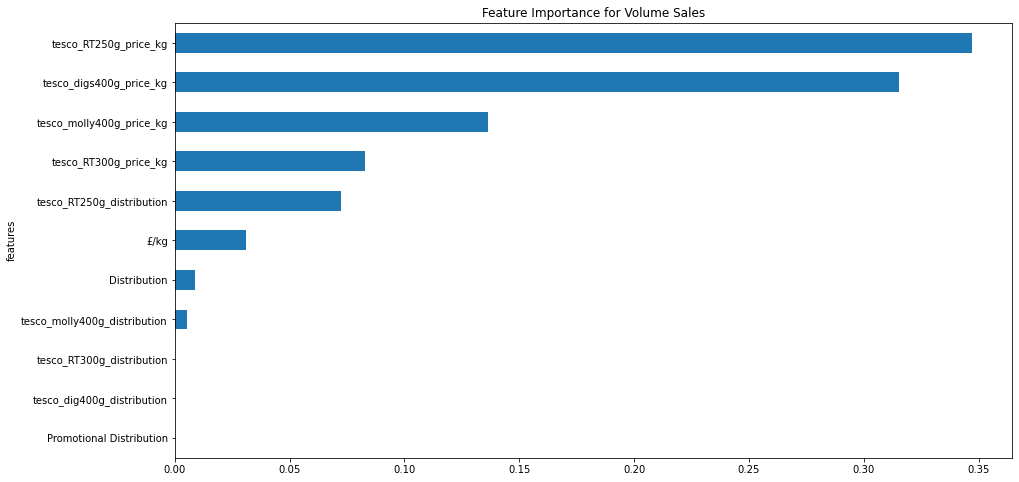

<Figure size 432x288 with 0 Axes>

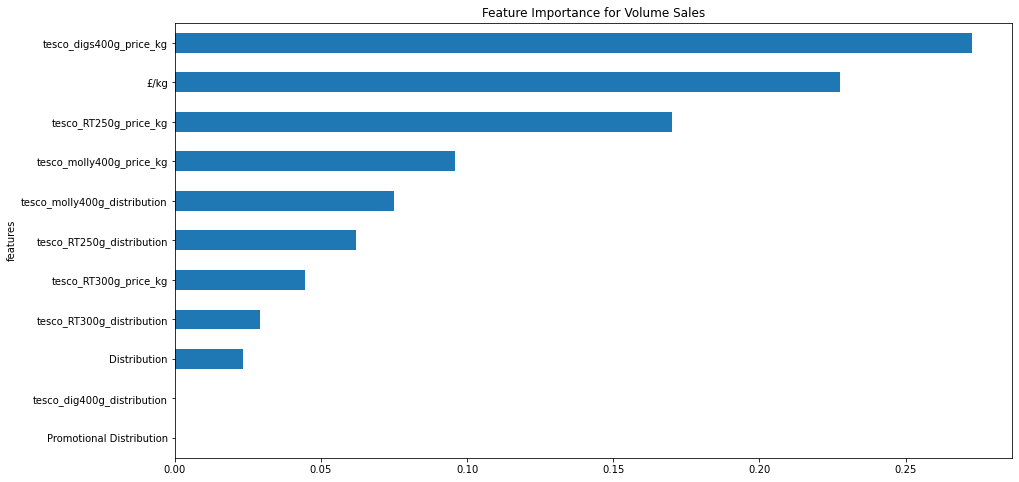

<Figure size 432x288 with 0 Axes>

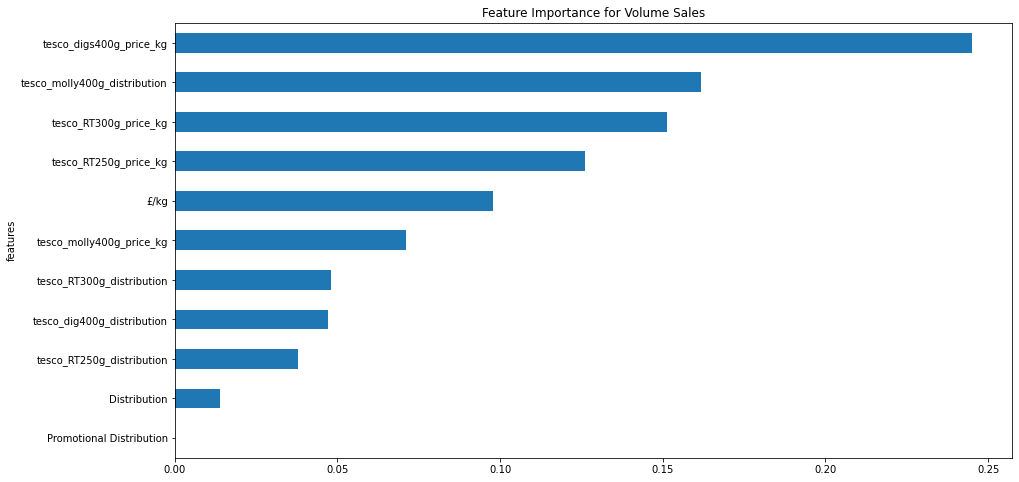

<Figure size 432x288 with 0 Axes>

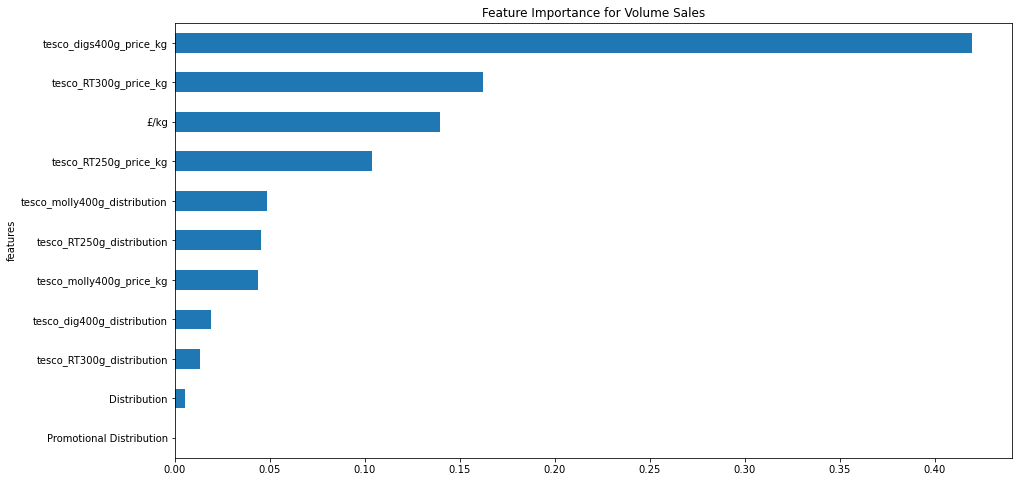

In [169]:
#drop rows
rf_regressor(mcv_dig_250g_input_X,mcv_dig_250g_input_Y)

### XGBoost Model

In [181]:
!pip3 install xgboost
from xgboost import XGBRegressor
import xgboost as xgb
# from sklearn.metrics import mean_squared_error


In [194]:
def xgb_regressor(X, y):
    splits = TimeSeriesSplit(n_splits=5)
    
    for train_index, test_index in splits.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print('Observations: %d' % (len(train_index) + len(test_index)))
        print('Training Observations: %d' % (len(train_index))) 
        print('Testing Observations: %d' % (len(test_index))) 
        from sklearn.preprocessing import StandardScaler


        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        from sklearn.ensemble import RandomForestRegressor
        from sklearn.model_selection import cross_val_score

        xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 5, alpha = 10, n_estimators = 10)
        xg_reg.fit(X_train, y_train)
        y_pred = xg_reg.predict(X_test)
        print(cross_val_score(xg_reg, X_train, y_train, cv=splits))

        from sklearn import metrics

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        #feature importance
        df_featImp = pd.DataFrame({'features':['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
#                    'tesco_molly400g_price_kg','tesco_molly400g_distribution',
#                    'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'], 'importance': xg_reg.feature_importances_})
        df_featImp = df_featImp.sort_values('importance').reset_index(drop=True)

        plt.figure()
        df_featImp.plot(kind='barh', x='features', y='importance', title="Feature Importance for Volume Sales",legend=False, figsize=(15, 8))


In [195]:
mcv_dig_250g_input_X,mcv_dig_250g_input_Y=input_var(mcv_dig_250g_with_comp)

Observations: 27
Training Observations: 15
Testing Observations: 12
[-1.65159290e+03 -2.17435781e+03 -1.19163526e+01 -1.95421933e+04
 -3.82901167e+01]
Mean Absolute Error: 2277.833056640625
Mean Squared Error: 5279546.139002428
Root Mean Squared Error: 2297.726297669596
Observations: 39
Training Observations: 27
Testing Observations: 12
[  -9.57849787   -4.00962223 -175.75846288 -197.80828953 -138.63549037]
Mean Absolute Error: 1406.37666015625
Mean Squared Error: 2126097.2514875163
Root Mean Squared Error: 1458.1142792962137
Observations: 51
Training Observations: 39
Testing Observations: 12
[  -1.79226712 -104.71477052 -154.93351156  -13.48582998 -126.97044614]
Mean Absolute Error: 1777.4797851562498
Mean Squared Error: 3384523.8858057763
Root Mean Squared Error: 1839.707554424283
Observations: 63
Training Observations: 51
Testing Observations: 12
[  -4.26380138 -153.95418207  -15.38219549  -92.30888328  -26.40696967]
Mean Absolute Error: 979.2365966796875
Mean Squared Error: 1153292

<Figure size 432x288 with 0 Axes>

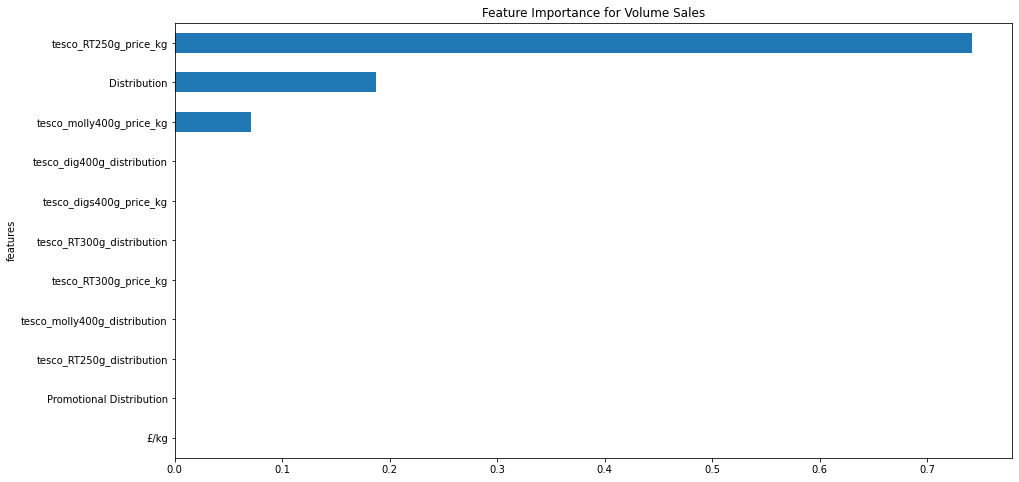

<Figure size 432x288 with 0 Axes>

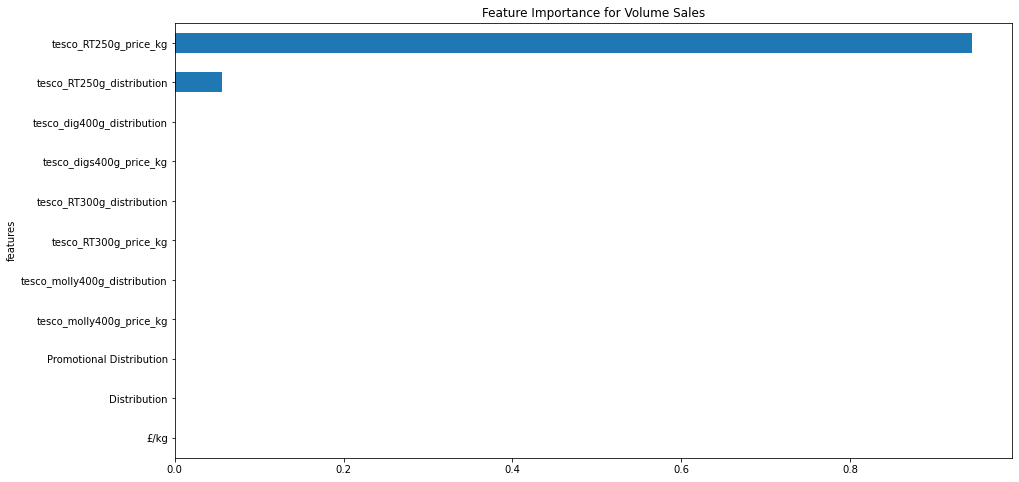

<Figure size 432x288 with 0 Axes>

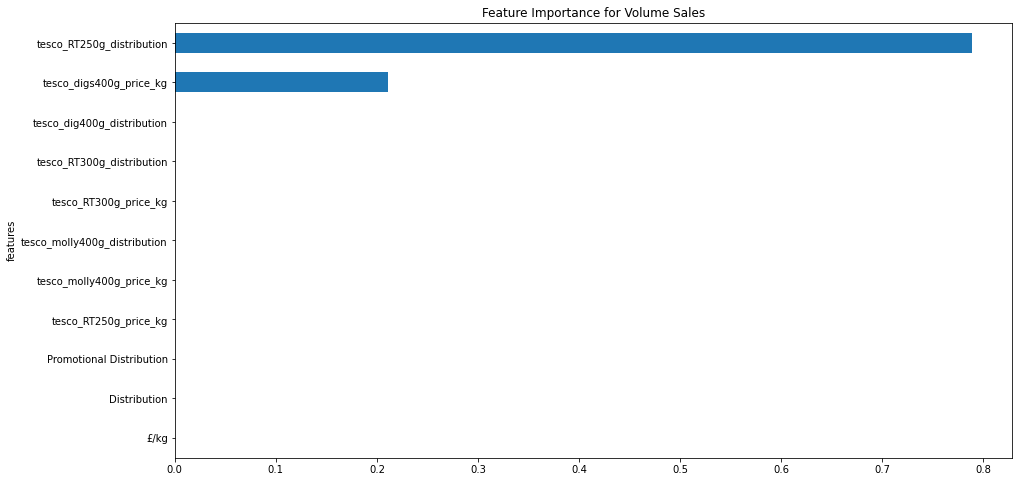

<Figure size 432x288 with 0 Axes>

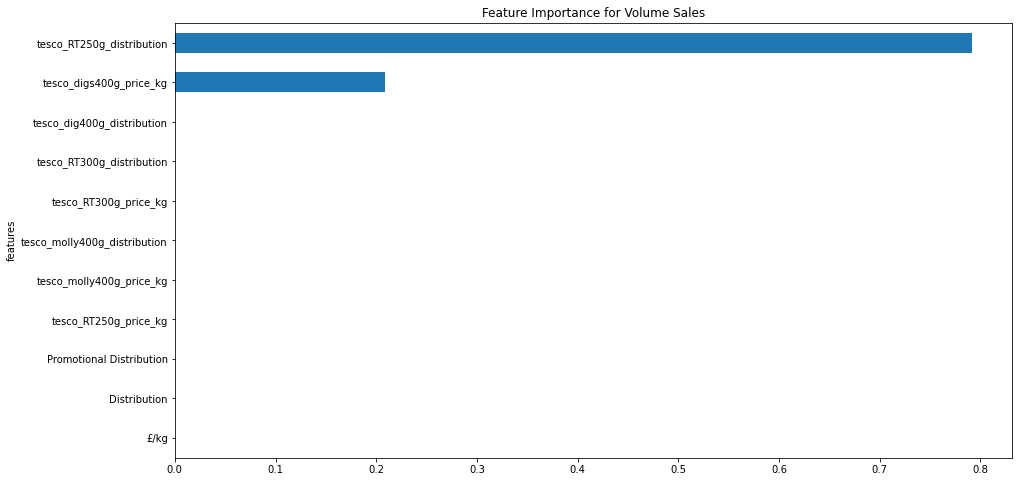

<Figure size 432x288 with 0 Axes>

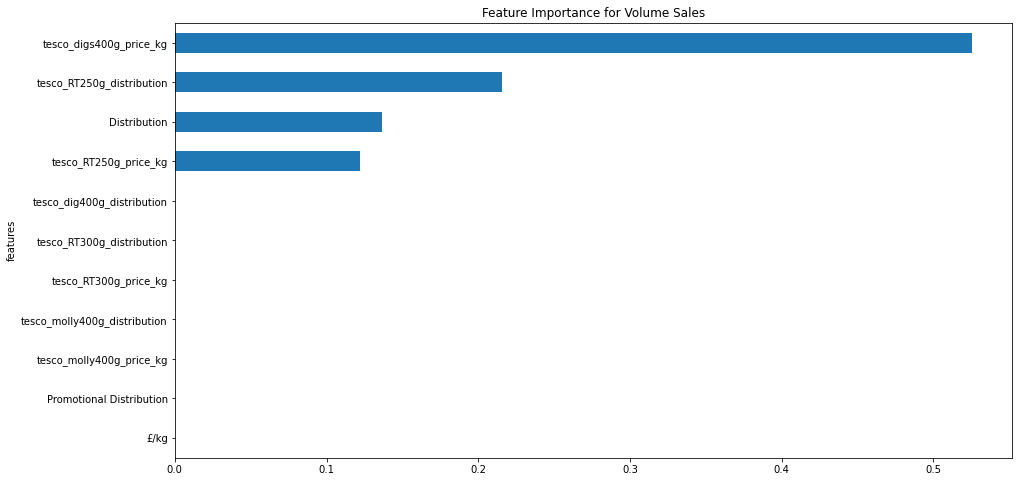

In [173]:
#dropna all
xgb_regressor(mcv_dig_250g_input_X,mcv_dig_250g_input_Y)

Observations: 95
Training Observations: 50
Testing Observations: 45
[ -24.36660605 -180.97841519 -178.46080998 -165.26249279 -393.65144977]
Mean Absolute Error: 2052.613113064236
Mean Squared Error: 4626333.084022021
Root Mean Squared Error: 2150.8912301699547
Observations: 140
Training Observations: 95
Testing Observations: 45
[-217.85935113 -208.58261647   -9.97620587  -11.23081641  -83.23973444]
Mean Absolute Error: 995.1739377170142
Mean Squared Error: 1558795.6023660293
Root Mean Squared Error: 1248.5173616598327
Observations: 185
Training Observations: 140
Testing Observations: 45
[-189.543804    -11.62448936  -94.41675863   -1.73762295  -30.32724716]
Mean Absolute Error: 783.734320746528
Mean Squared Error: 1584923.418063647
Root Mean Squared Error: 1258.937416261685
Observations: 230
Training Observations: 185
Testing Observations: 45
[-16.92112193 -14.77825552  -1.47876327  -4.7529419   -1.21915535]
Mean Absolute Error: 2172.6921223958334
Mean Squared Error: 5050561.189673388


<Figure size 432x288 with 0 Axes>

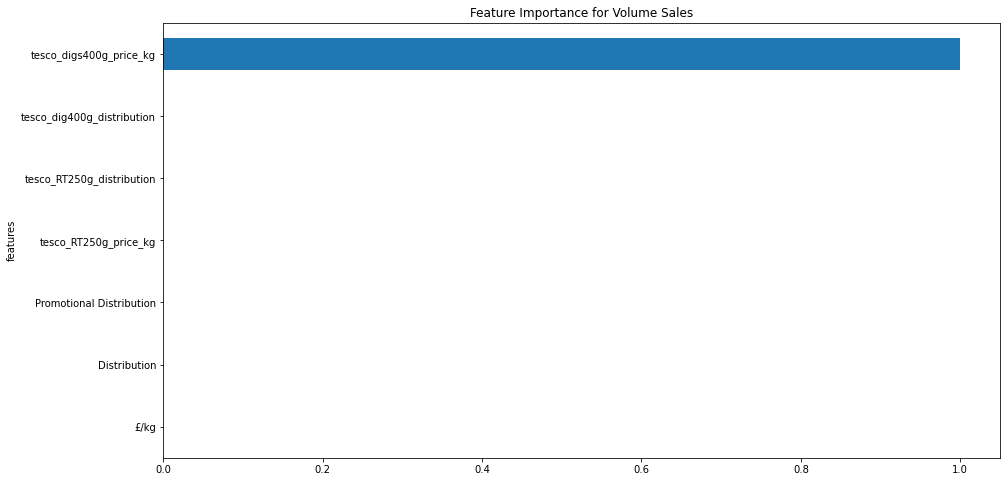

<Figure size 432x288 with 0 Axes>

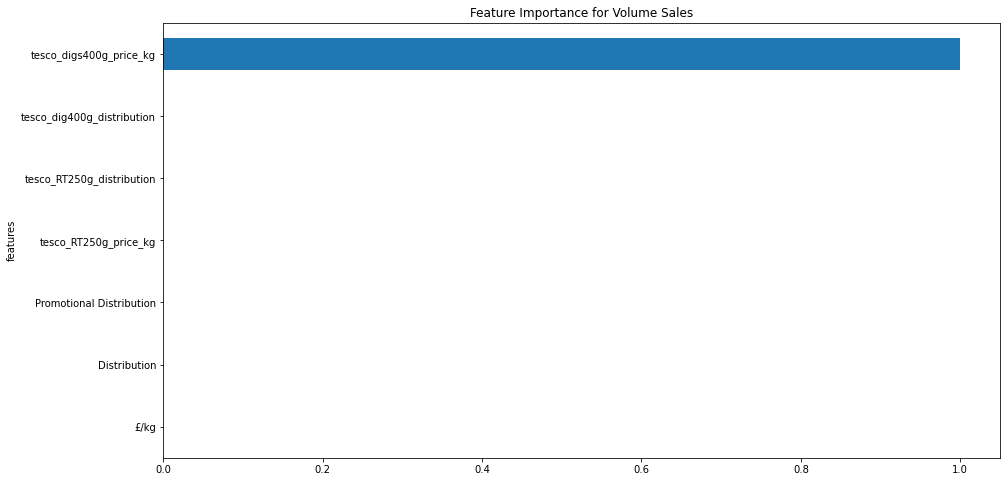

<Figure size 432x288 with 0 Axes>

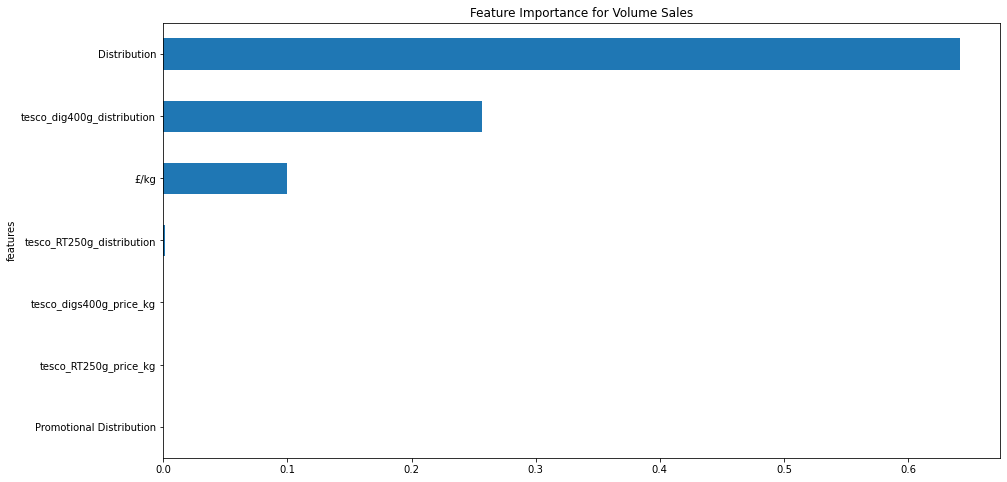

<Figure size 432x288 with 0 Axes>

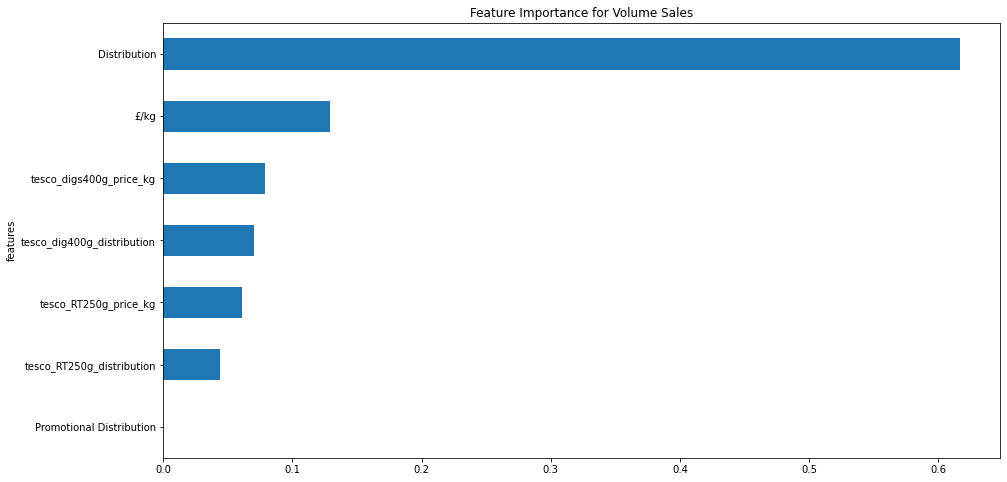

<Figure size 432x288 with 0 Axes>

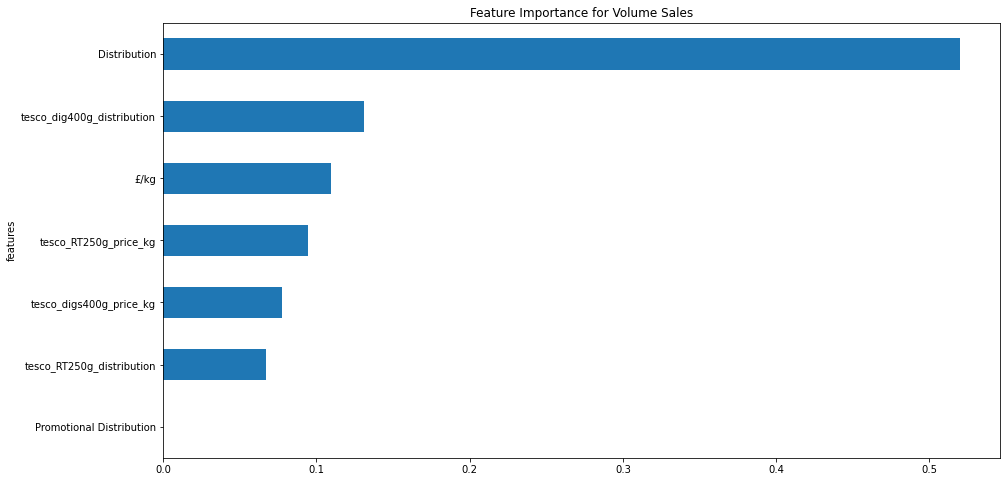

In [196]:
#dropna columns
xgb_regressor(mcv_dig_250g_input_X,mcv_dig_250g_input_Y)

### LSTM model

#### Univariate LSTM - Baseline Model

In [201]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from pandas import DataFrame
from pandas import concat
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it wi

In [245]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

mcv_dig_250g=data(mcv_dig_250g)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [246]:
mcv_dig_250g.head()

,Volume
Date,
2014-12-13,6563.0
2014-12-20,7179.8
2014-12-27,6617.0
2015-01-03,4842.8
2015-01-10,4856.0


In [247]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [250]:
# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#     if i == 0:
#         names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#     else:
#         names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
#   # put it all together
#     agg = concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg


In [251]:
# # load dataset
# values = mcv_dig_250g.values
# # integer encode direction
# #encoder = LabelEncoder()
# #values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict
# print(reframed.head())

In [252]:
# # split into train and test sets
# values = reframed.values
# train = values[:248]
# test = values[248:]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [253]:
# # design network
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(25))
# earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# # plot history
# plt.figure(figsize=(23, 15))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

In [254]:
# from numpy import concatenate

# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

In [248]:
#def function version
def lstm_univariate(dataset):
    # load dataset
    values = dataset.values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    print(reframed.head())
    
    # split into train and test sets
    values = reframed.values
    train = values[:248]
    test = values[248:]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    # design network
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(25))
    earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
    # plot history
    plt.figure(figsize=(23, 15))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
    from numpy import concatenate

    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)

   var1(t-1)   var1(t)
1   0.667107  0.761780
2   0.761780  0.675395
3   0.675395  0.403070
4   0.403070  0.405096
5   0.405096  0.487751
(248, 1, 1) (248,) (26, 1, 1) (26,)
Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 2s - loss: 0.4541 - val_loss: 0.2877
Epoch 2/50
248/248 - 0s - loss: 0.4368 - val_loss: 0.2715
Epoch 3/50
248/248 - 0s - loss: 0.4189 - val_loss: 0.2545
Epoch 4/50
248/248 - 0s - loss: 0.4000 - val_loss: 0.2363
Epoch 5/50
248/248 - 0s - loss: 0.3798 - val_loss: 0.2167
Epoch 6/50
248/248 - 0s - loss: 0.3578 - val_loss: 0.1967
Epoch 7/50
248/248 - 0s - loss: 0.3336 - val_loss: 0.1747
Epoch 8/50
248/248 - 0s - loss: 0.3068 - val_loss: 0.1508
Epoch 9/50
248/248 - 0s - loss: 0.2773 - val_loss: 0.1277
Epoch 10/50
248/248 - 0s - loss: 0.2448 - val_loss: 0.1040
Epoch 11/50
248/248 - 0s - loss: 0.2097 - val_loss: 0.0847
Epoch 12/50
248/248 - 0s - loss: 0.1760 - val_loss: 0.0797
Epoch 13/50
248/248 - 0s - loss: 0.1441 - val_loss: 0.0806
Epoch 00013: early stop

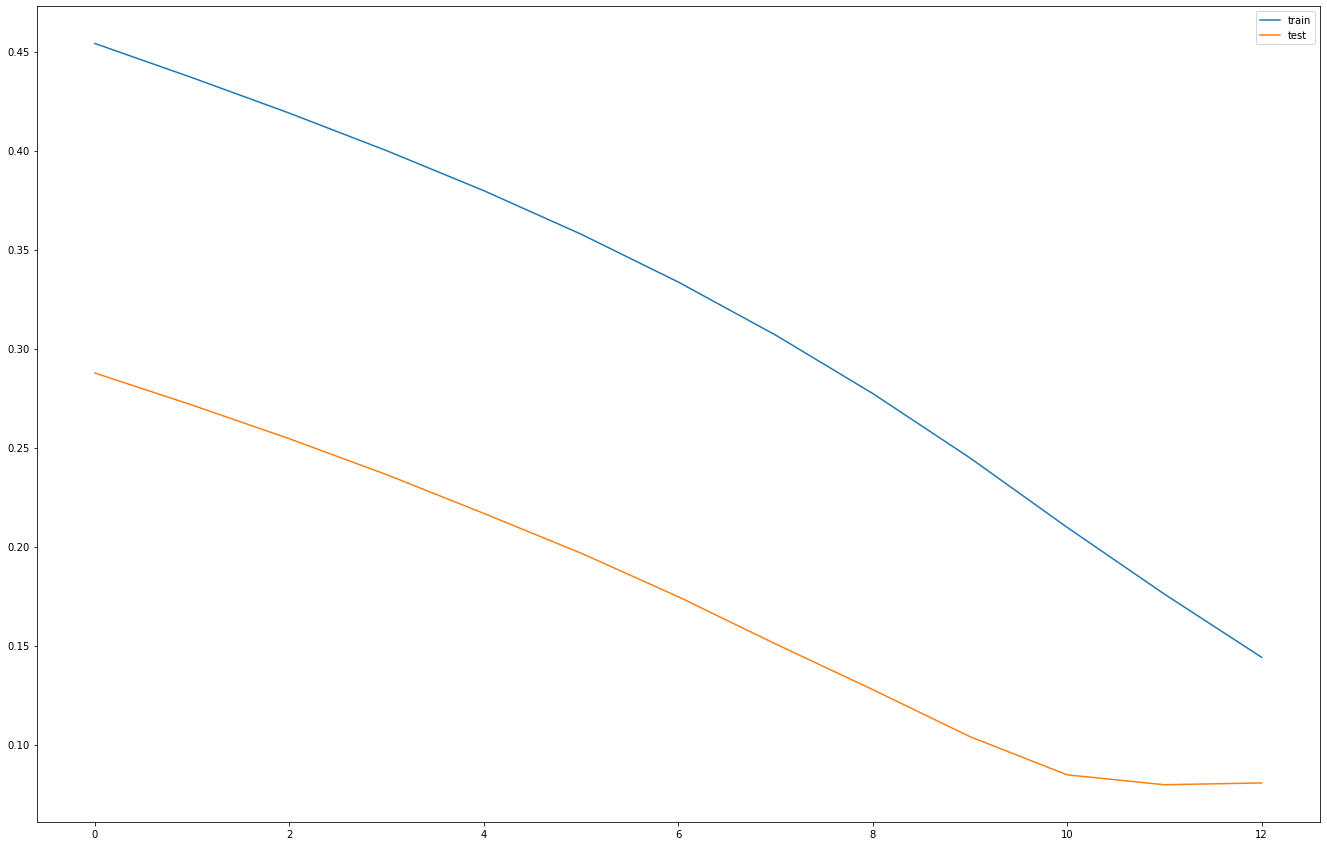

Test RMSE: 659.019


In [249]:
lstm_univariate(mcv_dig_250g)

#### Multivariate LSTM - Without Competitors' Variables

In [255]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    df=x.set_index('Date')
    df=df.drop(['Units', 'Value', '£/unit'], axis=1)
    return df

mcv_dig_250g=data(mcv_dig_250g)
# values=mcv_dig_250g.values

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var9(t-1)  \
201   0.404221   0.225574   0.268293        0.0   0.999664   0.928352   
202   0.454674   0.224650   0.268293        0.0   0.999626   0.928162   
203   0.472249   0.222833   0.243902        0.0   0.999663   0.932629   
204   0.478741   0.223495   0.243902        0.0   0.999506   0.931797   
205   0.444282   0.223249   0.243902        0.0   0.999449   0.929672   

     var10(t-1)  var11(t-1)  var12(t-1)   var1(t)  ...   var3(t)  var4(t)  \
201    0.613636    0.530742    0.989899  0.454674  ...  0.268293      0.0   
202    0.613636    0.530582    0.989899  0.472249  ...  0.243902      0.0   
203    0.613636    0.530672    0.989899  0.478741  ...  0.243902      0.0   
204    0.613636    0.531022    0.989899  0.444282  ...  0.243902      0.0   
205    0.613636    0.530540    0.989899  0.448764  ...  0.243902      0.0   

      var5(t)  var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  var11(t)  \
201  0.999626      1.0

In [258]:
def multivariate_lstm_without_competitor(df):
    values = df.values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
    print(reframed.head())

    # split into train and test sets
    values = reframed.values
    train = values[:248]
    test = values[248:]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # design network
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(25))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
    # plot history
    plt.figure(figsize=(23, 15))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    # make a prediction
    from numpy import concatenate

    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.667107   0.951219        0.0   0.227363  0.761780
2   0.761780   0.951219        0.0   0.226979  0.675395
3   0.675395   0.951219        0.0   0.227110  0.403070
4   0.403070   0.951219        0.0   0.227096  0.405096
5   0.405096   0.951219        0.0   0.226483  0.487751
(248, 1, 4) (248,) (26, 1, 4) (26,)
Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 2s - loss: 0.4529 - val_loss: 0.2847
Epoch 2/50
248/248 - 0s - loss: 0.4279 - val_loss: 0.2647
Epoch 3/50
248/248 - 0s - loss: 0.4018 - val_loss: 0.2429
Epoch 4/50
248/248 - 0s - loss: 0.3733 - val_loss: 0.2184
Epoch 5/50
248/248 - 0s - loss: 0.3412 - val_loss: 0.1918
Epoch 6/50
248/248 - 0s - loss: 0.3043 - val_loss: 0.1614
Epoch 7/50
248/248 - 0s - loss: 0.2617 - val_loss: 0.1287
Epoch 8/50
248/248 - 0s - loss: 0.2125 - val_loss: 0.0947
Epoch 9/50
248/248 - 0s - loss: 0.1615 - val_loss: 0.0691
Epoch 10/50
248/248 - 0s - loss: 0.1144 - val_loss: 0.0756
Ep

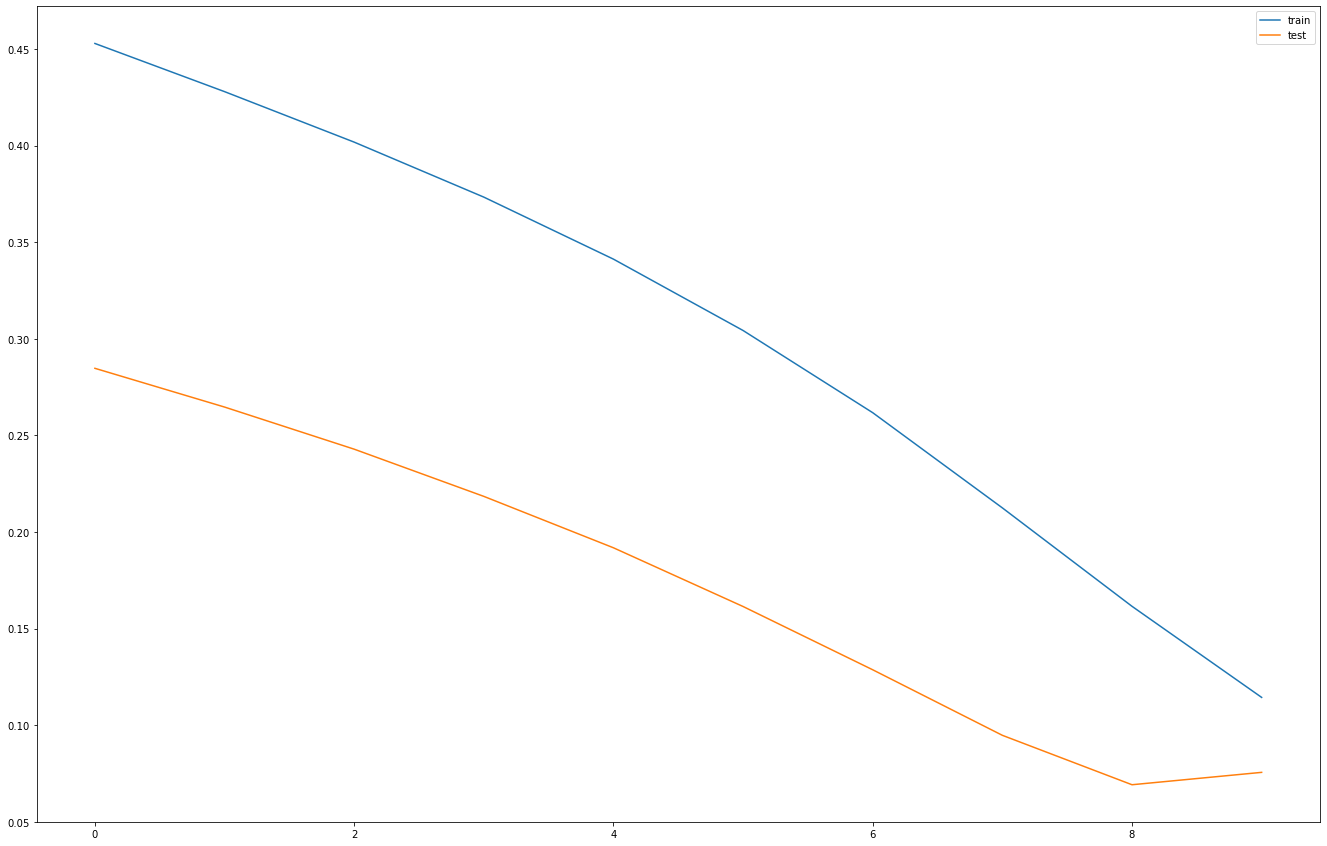

Test RMSE: 574.186


In [259]:
multivariate_lstm_without_competitor(mcv_dig_250g)

In [260]:
# # split into train and test sets
# values = reframed.values
# train = values[:248]
# test = values[248:]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [261]:
# # design network
# model = Sequential()
# model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(25))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# # plot history
# plt.figure(figsize=(23, 15))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

In [262]:
# # make a prediction
# from numpy import concatenate

# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

### LSTM Multivariate with Competitors'

In [266]:
# mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

# def data(x):
#     x=x[:275]
#     date_time = x['SDESC'].str[3:]
#     date_time=pd.to_datetime(date_time, format='%d.%m.%y')
#     x['SDESC']=date_time
#     x.rename(columns={'SDESC':'Date'}, inplace=True)
#     x.index=x.index+1
#     df=x[['Date','Volume']]
#     df=df.set_index('Date')
#     return df

# mcv_dig_250g=data(mcv_dig_250g)

In [264]:
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2018-10-13,4850.3,3.559244,69,0,2.241567,100,0.775123,14.0,0.999896,83.0,1.125344,99
2018-10-20,5179.0,3.558718,69,0,2.241541,100,0.775011,57.0,0.999892,83.0,1.125224,99
2018-10-27,5293.5,3.557684,68,0,2.241566,100,0.774954,57.0,0.999978,83.0,1.125292,99
2018-11-03,5335.8,3.558061,68,0,2.241457,100,0.775021,57.0,0.999962,83.0,1.125552,99
2018-11-10,5111.3,3.557921,68,0,2.241417,100,0.774982,58.0,0.999921,83.0,1.125193,99


In [265]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# # load dataset
# #dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = mcv_dig_250g_with_comp.values
# # integer encode direction
# #encoder = LabelEncoder()
# #values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
# print(reframed.head())



In [266]:
def multivariate_with_competitor(df):
    values = df.values
    # integer encode direction
    #encoder = LabelEncoder()
    #values[:,4] = encoder.fit_transform(values[:,4])
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
    print(reframed.head())

    # split into train and test sets
    values = reframed.values
    train_size = int(len(values) * 0.8)
    train=values[:train_size]
    test=values[train_size:]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    model = Sequential()
    earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(25))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
    # plot history
    plt.figure(figsize=(23, 15))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    from numpy import concatenate

    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.479544   0.009893   1.000000        0.0   0.994400        1.0   
2   0.554461   0.008713   1.000000        0.0   0.993778        1.0   
3   0.580558   0.006390   0.909091        0.0   0.994396        1.0   
4   0.590199   0.007236   0.909091        0.0   0.991779        1.0   
5   0.539031   0.006921   0.909091        0.0   0.990829        1.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.980005   0.136842   0.982941         0.5    0.760128         1.0   
2   0.979163   0.589474   0.982361         0.5    0.759899         1.0   
3   0.978738   0.589474   0.995712         0.5    0.760028         1.0   
4   0.979244   0.589474   0.993225         0.5    0.760529         1.0   
5   0.978948   0.600000   0.986877         0.5    0.759839         1.0   

    var1(t)  
1  0.554461  
2  0.580558  
3  0.590199  
4  0.539031  
5  0.545687  
(59, 1, 12) (59,) (15, 1, 12) (15,)
Train on

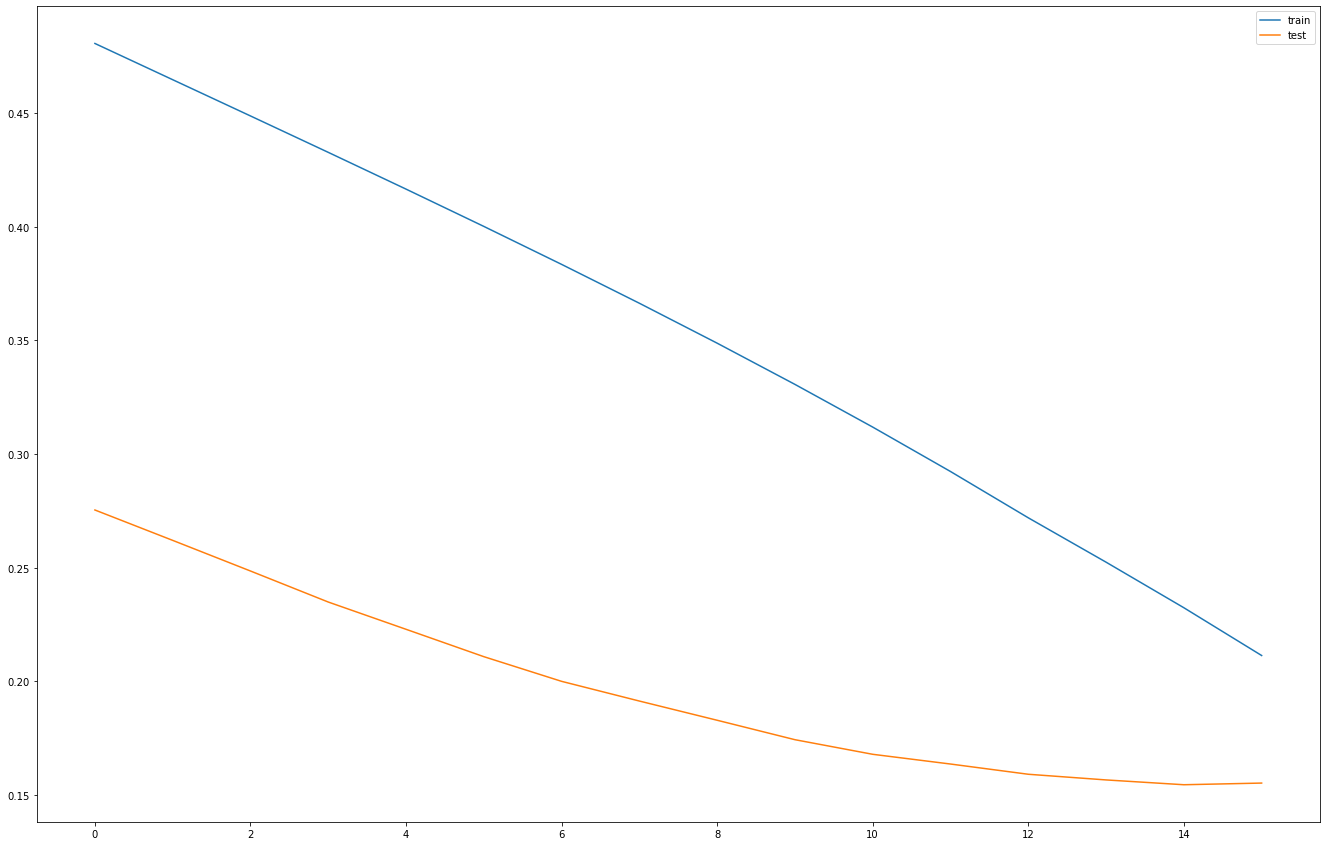

Test RMSE: 845.237


In [268]:
multivariate_with_competitor(mcv_dig_250g_with_comp)

In [273]:
# # split into train and test sets
# values = reframed.values
# train_size = int(len(values) * 0.8)
# train=values[:train_size]
# test=values[train_size:]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [272]:
# model = Sequential()
# earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(25))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# # plot history
# plt.figure(figsize=(23, 15))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [271]:
# from numpy import concatenate

# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

# # calculate RMSE
# x=len(train_X)+1
# mcv_dig_250g_with_comp["Volume_lstm"]=""
# mcv_dig_250g_with_comp["Volume_lstm"][x:]=inv_yhat

# plt.figure(figsize=(23,8))
# plt.plot(values[:248], label='Train')
# plt.plot(values[248:], label='Test')
# plt.plot(mcv_dig_250g_with_comp["Volume_lstm"][x:], label='LSTM Model Predicted Model')
# plt.title('Result of LSTM Model For Sales Volume', size = 30)
# plt.ylabel('Volume',size=20)
# plt.xlabel('Date',size=20)
# plt.legend(loc='best')
# plt.show()


In [270]:
# model = Sequential()
# earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(25))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# # plot history
# plt.figure(figsize=(23, 15))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

In [269]:
# from numpy import concatenate

# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

### 这里以上都整理完了

In [ ]:
#数据的突变点
from fbprophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

In [ ]:
# cross validation (不要)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_holiday, horizon = '180 days')
df_cv.head()


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
